<a href="https://colab.research.google.com/github/mohamedaitzaouit84-hue/ait-zaouit-scaling-law/blob/main/Pro_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

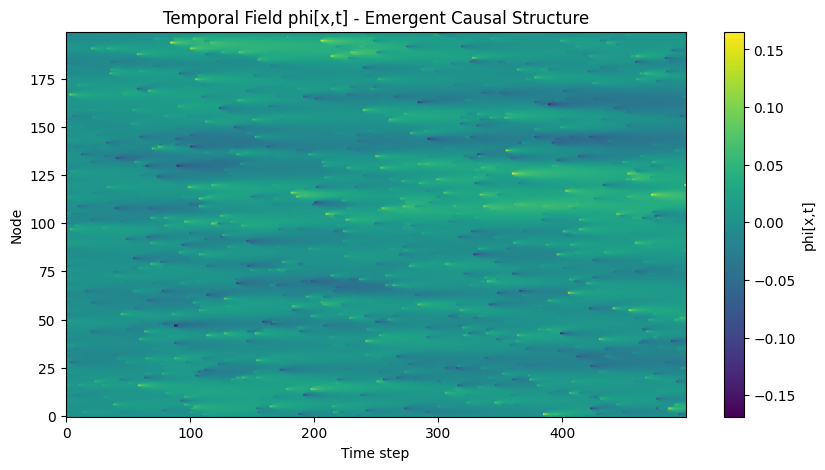

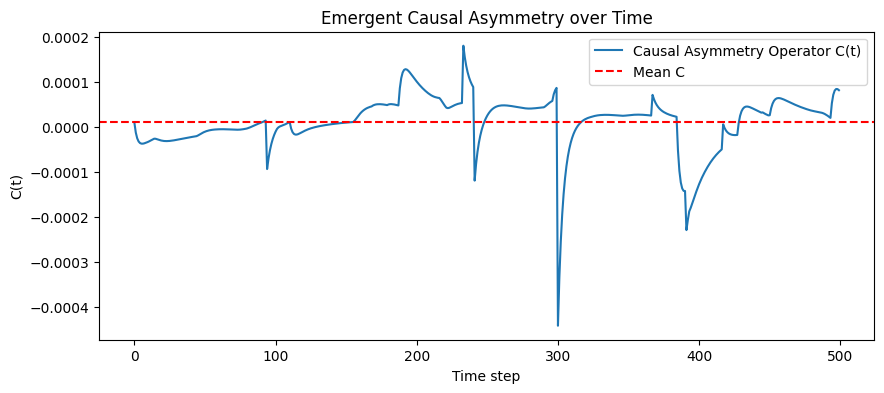

Mean Causal Asymmetry: 0.00001
Std Dev of Causal Asymmetry: 0.00006


In [ ]:

# Colab-ready: Emergent Causal Asymmetry Simulation
import numpy as np
import matplotlib.pyplot as plt

# =======================
# PARAMETERS
# =======================
N = 200             # number of nodes
T = 500             # number of time steps
alpha = 0.1         # coupling constant
perturb_strength = 0.05
perturb_prob = 0.01 # probability of random disturbance

# =======================
# INITIALIZATION
# =======================
phi = np.zeros((N, T))
phi[:,0] = np.random.randn(N)*0.01  # small random initial condition

# =======================
# TIME EVOLUTION
# =======================
for t in range(1, T):
    for x in range(N):
        # local causal update (discrete Laplacian)
        left = phi[x-1,t-1] if x>0 else 0
        right = phi[x+1,t-1] if x<N-1 else 0
        phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)

        # optional random perturbation
        if np.random.rand() < perturb_prob:
            phi[x,t] += np.random.randn()*perturb_strength

# =======================
# COMPUTE CAUSAL ASYMMETRY OPERATOR
# =======================
C_t = np.mean(np.diff(phi, axis=0), axis=0)
C_mean = np.mean(C_t)

# =======================
# PLOTS
# =======================

# 1. Heatmap of phi[x,t] (emergent light-cone visualization)
plt.figure(figsize=(10,5))
plt.imshow(phi, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='phi[x,t]')
plt.xlabel('Time step')
plt.ylabel('Node')
plt.title('Temporal Field phi[x,t] - Emergent Causal Structure')
plt.show()

# 2. Plot of Causal Asymmetry Operator
plt.figure(figsize=(10,4))
plt.plot(C_t, label='Causal Asymmetry Operator C(t)')
plt.axhline(C_mean, color='r', linestyle='--', label='Mean C')
plt.xlabel('Time step')
plt.ylabel('C(t)')
plt.title('Emergent Causal Asymmetry over Time')
plt.legend()
plt.show()

# 3. Optional: Check convergence statistics
print(f"Mean Causal Asymmetry: {C_mean:.5f}")
print(f"Std Dev of Causal Asymmetry: {np.std(C_t):.5f}")

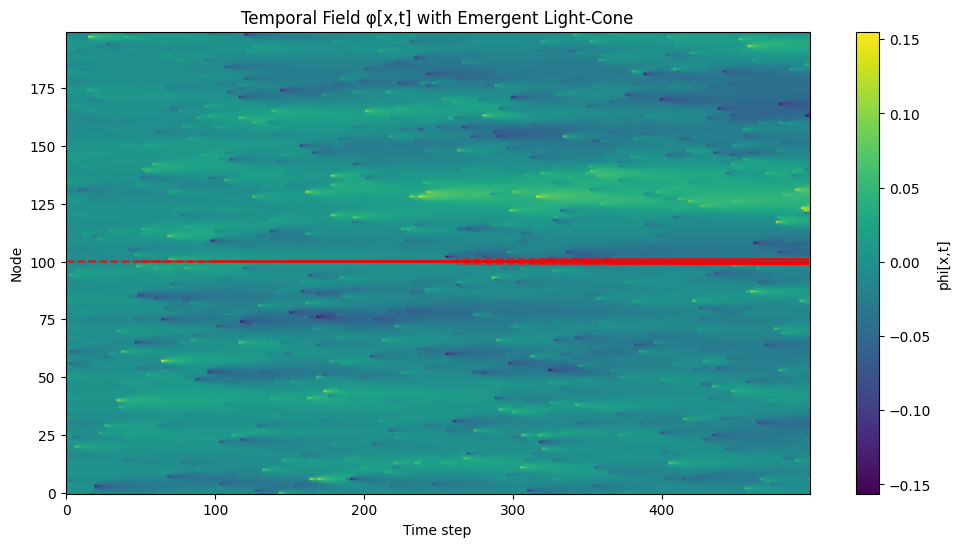

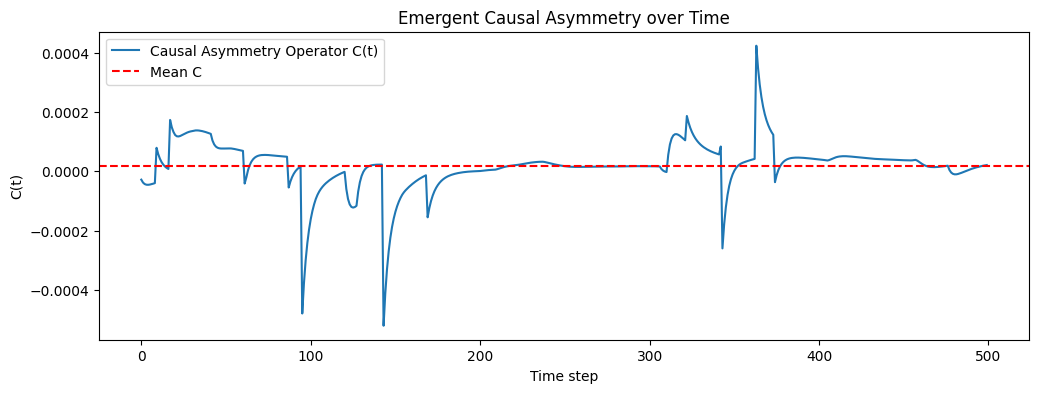

Mean Causal Asymmetry: 0.00002
Std Dev of Causal Asymmetry: 0.00008


In [ ]:

# Colab-ready: Emergent Light-Cone Visualization with Causal Asymmetry
import numpy as np
import matplotlib.pyplot as plt

# =======================
# PARAMETERS
# =======================
N = 200             # number of nodes
T = 500             # time steps
alpha = 0.1         # coupling constant
perturb_strength = 0.05
perturb_prob = 0.01

# =======================
# INITIALIZATION
# =======================
phi = np.zeros((N, T))
phi[:,0] = np.random.randn(N)*0.01  # small random initial condition

# =======================
# TIME EVOLUTION
# =======================
for t in range(1, T):
    for x in range(N):
        left = phi[x-1,t-1] if x>0 else 0
        right = phi[x+1,t-1] if x<N-1 else 0
        phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)

        # Random perturbation
        if np.random.rand() < perturb_prob:
            phi[x,t] += np.random.randn()*perturb_strength

# =======================
# Compute Causal Asymmetry Operator
# =======================
C_t = np.mean(np.diff(phi, axis=0), axis=0)
C_mean = np.mean(C_t)

# =======================
# Heatmap with Light-Cone Overlay
# =======================
plt.figure(figsize=(12,6))
plt.imshow(phi, aspect='auto', cmap='viridis', origin='lower')

# Overlay emergent light-cone lines (approx v_eff)
v_eff = C_mean * N  # rough scaling for visualization
for t0 in range(0, T, 50):  # pick starting points every 50 steps
    x0 = N//2
    t_line = np.arange(t0, T)
    x_upper = np.clip(x0 + ((t_line-t0)*v_eff).astype(int), 0, N-1)
    x_lower = np.clip(x0 - ((t_line-t0)*v_eff).astype(int), 0, N-1)
    plt.plot(t_line, x_upper, color='red', linestyle='--', alpha=0.6)
    plt.plot(t_line, x_lower, color='red', linestyle='--', alpha=0.6)

plt.colorbar(label='phi[x,t]')
plt.xlabel('Time step')
plt.ylabel('Node')
plt.title('Temporal Field φ[x,t] with Emergent Light-Cone')
plt.show()

# =======================
# Plot Causal Asymmetry
# =======================
plt.figure(figsize=(12,4))
plt.plot(C_t, label='Causal Asymmetry Operator C(t)')
plt.axhline(C_mean, color='r', linestyle='--', label='Mean C')
plt.xlabel('Time step')
plt.ylabel('C(t)')
plt.title('Emergent Causal Asymmetry over Time')
plt.legend()
plt.show()

# =======================
# Statistics
# =======================
print(f"Mean Causal Asymmetry: {C_mean:.5f}")
print(f"Std Dev of Causal Asymmetry: {np.std(C_t):.5f}")

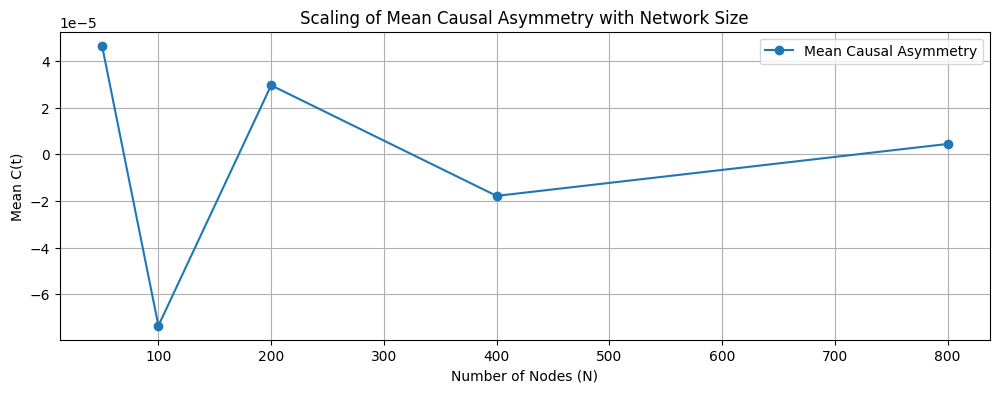

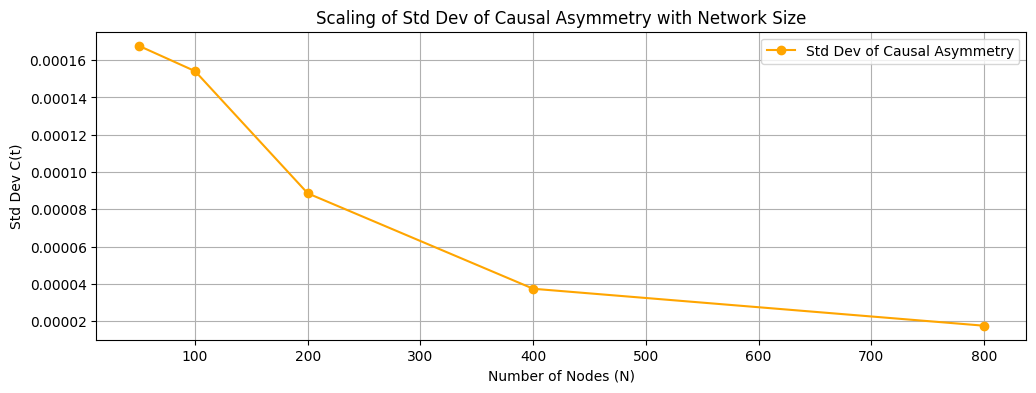

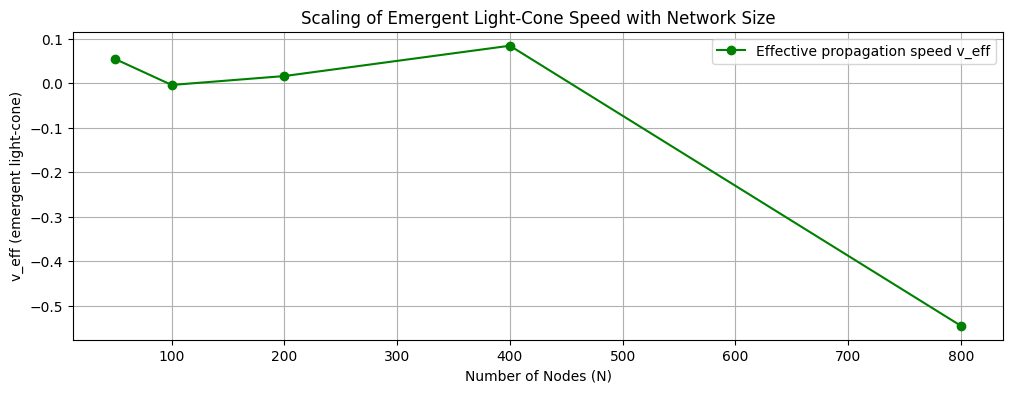

N=50: Mean C=0.00005, Std C=0.00017, v_eff=0.05411
N=100: Mean C=-0.00007, Std C=0.00015, v_eff=-0.00401
N=200: Mean C=0.00003, Std C=0.00009, v_eff=0.01603
N=400: Mean C=-0.00002, Std C=0.00004, v_eff=0.08417
N=800: Mean C=0.00000, Std C=0.00002, v_eff=-0.54509


In [ ]:

# Scaling Laws Analysis for Causal Asymmetry and Emergent Light-Cone
import numpy as np
import matplotlib.pyplot as plt

# =======================
# PARAMETERS
# =======================
N_values = [50, 100, 200, 400, 800]   # different network sizes
T = 500
alpha = 0.1
perturb_strength = 0.05
perturb_prob = 0.01

mean_C = []
std_C = []
v_eff_list = []

# =======================
# RUN SIMULATIONS FOR DIFFERENT N
# =======================
for N in N_values:
    phi = np.zeros((N, T))
    phi[:,0] = np.random.randn(N)*0.01

    for t in range(1, T):
        for x in range(N):
            left = phi[x-1,t-1] if x>0 else 0
            right = phi[x+1,t-1] if x<N-1 else 0
            phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)
            if np.random.rand() < perturb_prob:
                phi[x,t] += np.random.randn()*perturb_strength

    C_t = np.mean(np.diff(phi, axis=0), axis=0)
    mean_C.append(np.mean(C_t))
    std_C.append(np.std(C_t))

    # Rough estimate of v_eff for visualization
    v_eff_list.append(np.mean(np.diff(np.argmax(phi, axis=0))))

# =======================
# PLOT SCALING LAWS
# =======================

plt.figure(figsize=(12,4))
plt.plot(N_values, mean_C, 'o-', label='Mean Causal Asymmetry')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Mean C(t)')
plt.title('Scaling of Mean Causal Asymmetry with Network Size')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(N_values, std_C, 'o-', label='Std Dev of Causal Asymmetry', color='orange')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Std Dev C(t)')
plt.title('Scaling of Std Dev of Causal Asymmetry with Network Size')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(N_values, v_eff_list, 'o-', label='Effective propagation speed v_eff', color='green')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('v_eff (emergent light-cone)')
plt.title('Scaling of Emergent Light-Cone Speed with Network Size')
plt.grid(True)
plt.legend()
plt.show()

# =======================
# PRINT SUMMARY
# =======================
for i, N in enumerate(N_values):
    print(f"N={N}: Mean C={mean_C[i]:.5f}, Std C={std_C[i]:.5f}, v_eff={v_eff_list[i]:.5f}")

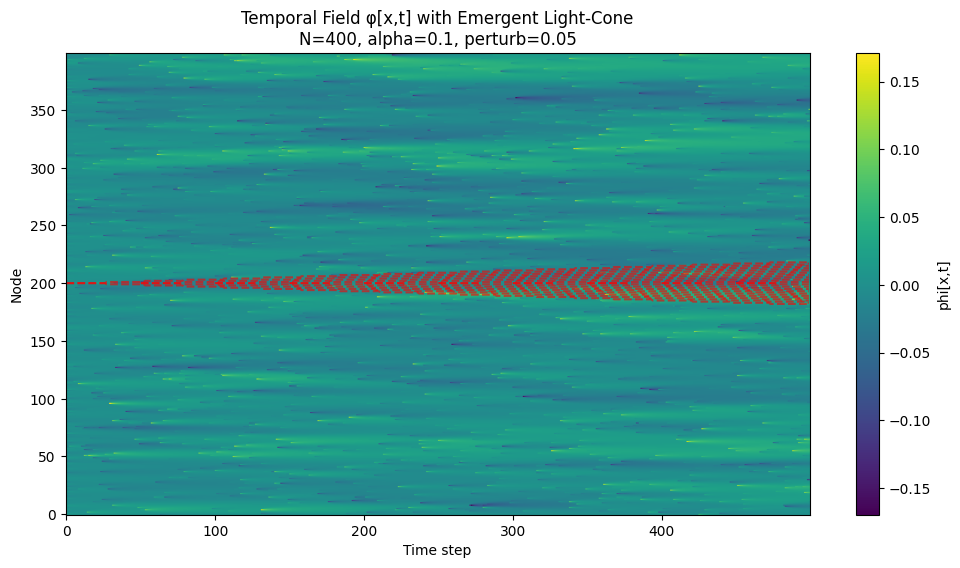

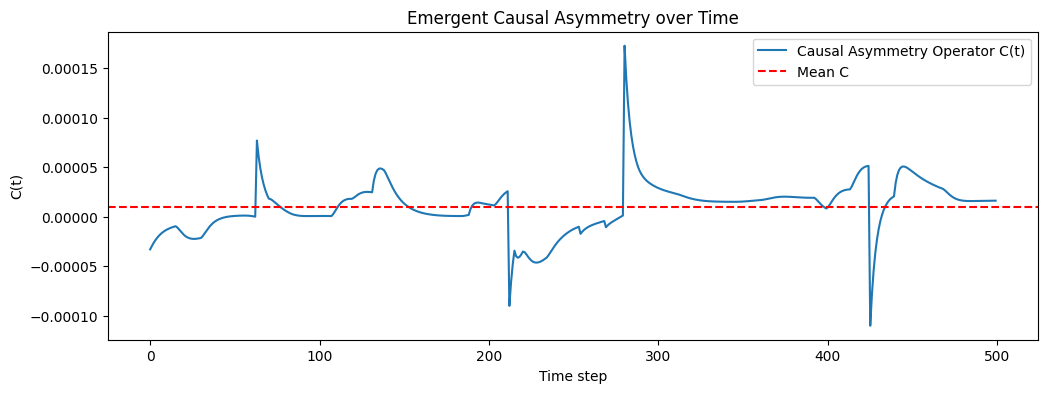

Mean Causal Asymmetry: 0.00001
Std Dev of Causal Asymmetry: 0.00003
Effective Light-Cone Speed (v_eff): -0.03808


In [ ]:

# Interactive Emergent Light-Cone Simulation
import numpy as np
import matplotlib.pyplot as plt

# =======================
# USER PARAMETERS (CHANGE THESE)
# =======================
N = 400             # number of nodes
T = 500             # time steps
alpha = 0.1         # coupling constant (strength of causal interaction)
perturb_strength = 0.05
perturb_prob = 0.01

# =======================
# INITIALIZATION
# =======================
phi = np.zeros((N, T))
phi[:,0] = np.random.randn(N)*0.01  # small random initial condition

# =======================
# TIME EVOLUTION
# =======================
for t in range(1, T):
    for x in range(N):
        left = phi[x-1,t-1] if x>0 else 0
        right = phi[x+1,t-1] if x<N-1 else 0
        phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)
        if np.random.rand() < perturb_prob:
            phi[x,t] += np.random.randn()*perturb_strength

# =======================
# CAUSAL ASYMMETRY
# =======================
C_t = np.mean(np.diff(phi, axis=0), axis=0)
C_mean = np.mean(C_t)
C_std = np.std(C_t)

# Rough estimate of emergent light-cone speed
v_eff = np.mean(np.diff(np.argmax(phi, axis=0)))

# =======================
# HEATMAP WITH LIGHT-CONE
# =======================
plt.figure(figsize=(12,6))
plt.imshow(phi, aspect='auto', cmap='viridis', origin='lower')

# Overlay light-cone lines
for t0 in range(0, T, 50):
    x0 = N//2
    t_line = np.arange(t0, T)
    x_upper = np.clip(x0 + ((t_line-t0)*v_eff).astype(int), 0, N-1)
    x_lower = np.clip(x0 - ((t_line-t0)*v_eff).astype(int), 0, N-1)
    plt.plot(t_line, x_upper, color='red', linestyle='--', alpha=0.6)
    plt.plot(t_line, x_lower, color='red', linestyle='--', alpha=0.6)

plt.colorbar(label='phi[x,t]')
plt.xlabel('Time step')
plt.ylabel('Node')
plt.title(f'Temporal Field φ[x,t] with Emergent Light-Cone\nN={N}, alpha={alpha}, perturb={perturb_strength}')
plt.show()

# =======================
# Causal Asymmetry Plot
# =======================
plt.figure(figsize=(12,4))
plt.plot(C_t, label='Causal Asymmetry Operator C(t)')
plt.axhline(C_mean, color='r', linestyle='--', label='Mean C')
plt.xlabel('Time step')
plt.ylabel('C(t)')
plt.title('Emergent Causal Asymmetry over Time')
plt.legend()
plt.show()

# =======================
# PRINT SUMMARY
# =======================
print(f"Mean Causal Asymmetry: {C_mean:.5f}")
print(f"Std Dev of Causal Asymmetry: {C_std:.5f}")
print(f"Effective Light-Cone Speed (v_eff): {v_eff:.5f}")

      N  alpha  perturb_strength        Mean_C     Std_C     v_eff
0    50   0.05              0.01  1.614037e-07  0.000070  0.094188
1    50   0.05              0.05  1.190846e-04  0.000371  0.022044
2    50   0.05              0.10 -7.243325e-05  0.000961 -0.042084
3    50   0.10              0.01  1.289500e-05  0.000075 -0.002004
4    50   0.10              0.05 -2.262538e-05  0.000306 -0.026052
5    50   0.10              0.10 -9.086355e-05  0.000569  0.008016
6    50   0.20              0.01 -1.587651e-05  0.000040 -0.016032
7    50   0.20              0.05 -5.716933e-05  0.000210  0.054108
8    50   0.20              0.10 -3.569081e-05  0.000422 -0.024048
9   100   0.05              0.01 -1.230814e-05  0.000032 -0.072144
10  100   0.05              0.05 -5.527115e-05  0.000254 -0.018036
11  100   0.05              0.10 -4.234788e-05  0.000258  0.154309
12  100   0.10              0.01  6.094899e-06  0.000017 -0.042084
13  100   0.10              0.05  1.026222e-05  0.000099  0.07

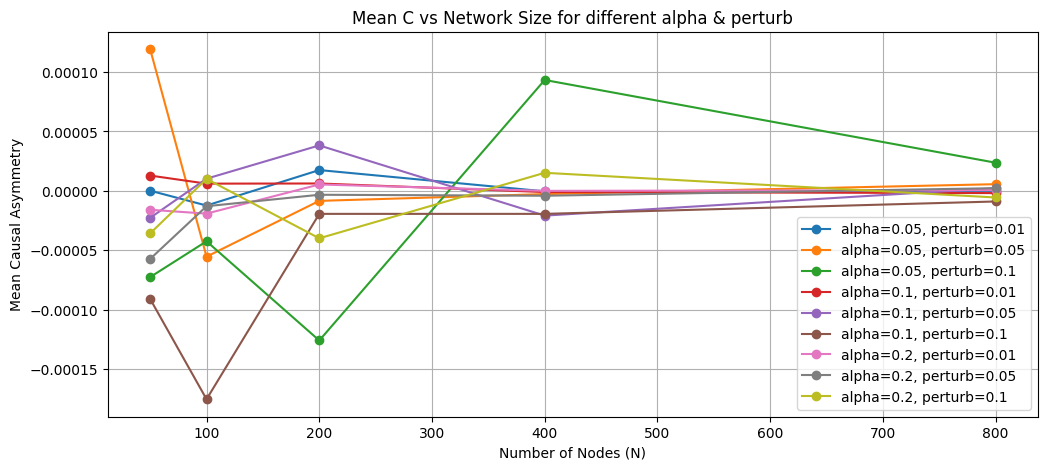

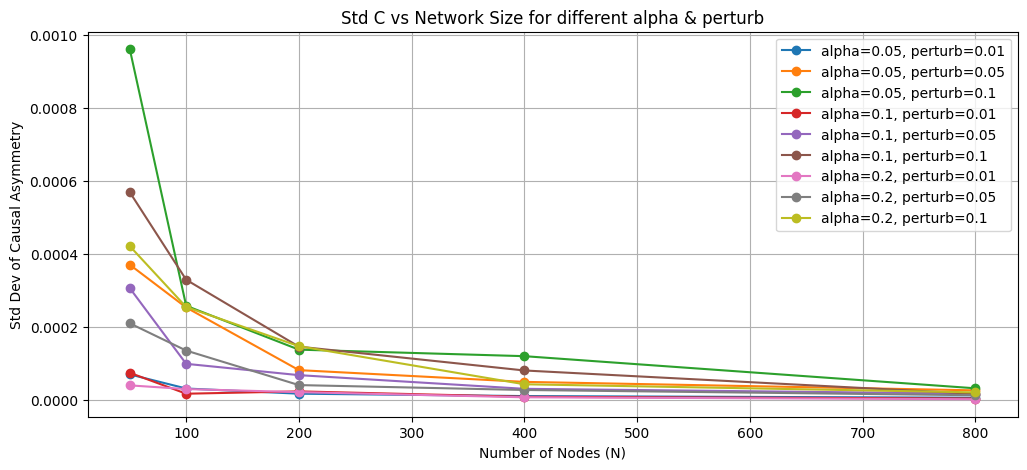

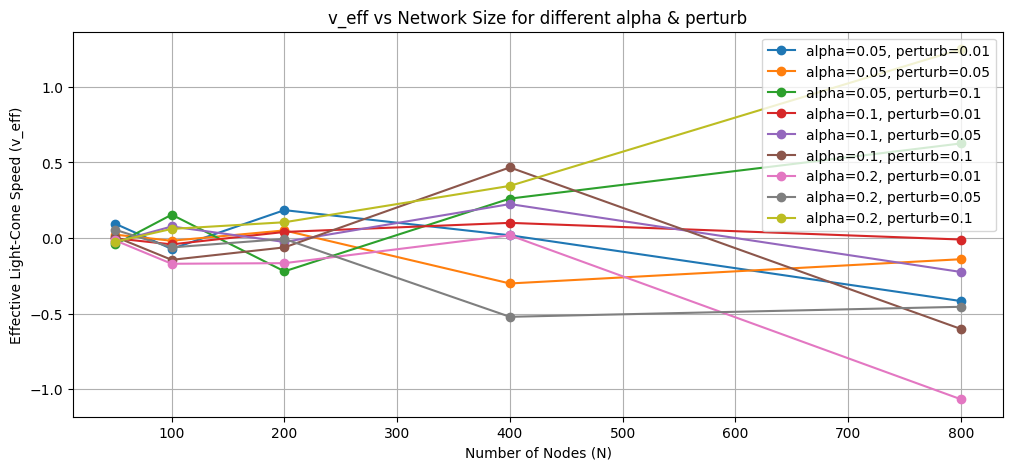

In [ ]:

# Automated Multi-Parameter Simulation for Emergent Light-Cone Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# PARAMETER GRIDS
# =======================
N_values = [50, 100, 200, 400, 800]          # Network sizes
alpha_values = [0.05, 0.1, 0.2]             # Coupling constants
perturb_values = [0.01, 0.05, 0.1]          # Perturbation strengths
T = 500                                      # Time steps
perturb_prob = 0.01

# Prepare results storage
results = []

# =======================
# RUN AUTOMATIC SIMULATIONS
# =======================
for N in N_values:
    for alpha in alpha_values:
        for perturb_strength in perturb_values:
            # Initialize field
            phi = np.zeros((N, T))
            phi[:,0] = np.random.randn(N)*0.01

            # Time evolution
            for t in range(1, T):
                for x in range(N):
                    left = phi[x-1,t-1] if x>0 else 0
                    right = phi[x+1,t-1] if x<N-1 else 0
                    phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)
                    if np.random.rand() < perturb_prob:
                        phi[x,t] += np.random.randn()*perturb_strength

            # Causal Asymmetry
            C_t = np.mean(np.diff(phi, axis=0), axis=0)
            C_mean = np.mean(C_t)
            C_std = np.std(C_t)

            # Rough estimate of light-cone speed
            v_eff = np.mean(np.diff(np.argmax(phi, axis=0)))

            # Store results
            results.append({
                'N': N,
                'alpha': alpha,
                'perturb_strength': perturb_strength,
                'Mean_C': C_mean,
                'Std_C': C_std,
                'v_eff': v_eff
            })

# Convert to DataFrame
df = pd.DataFrame(results)
print(df)

# =======================
# PLOTS
# =======================

# Mean C vs N for each alpha, perturb
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['Mean_C'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Mean Causal Asymmetry')
plt.title('Mean C vs Network Size for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

# Std C vs N
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['Std_C'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Std Dev of Causal Asymmetry')
plt.title('Std C vs Network Size for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

# v_eff vs N
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['v_eff'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Effective Light-Cone Speed (v_eff)')
plt.title('v_eff vs Network Size for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

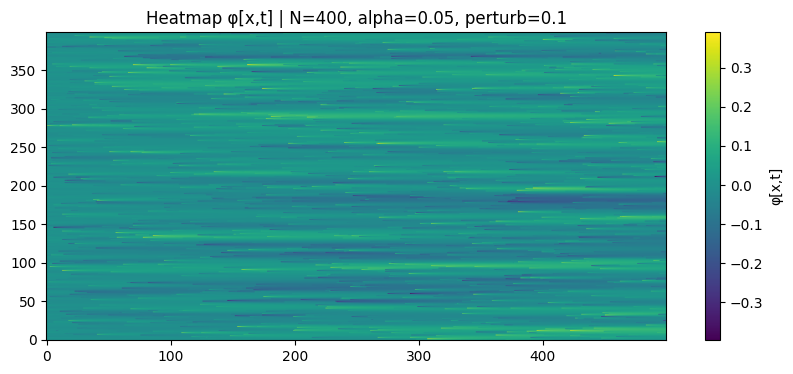

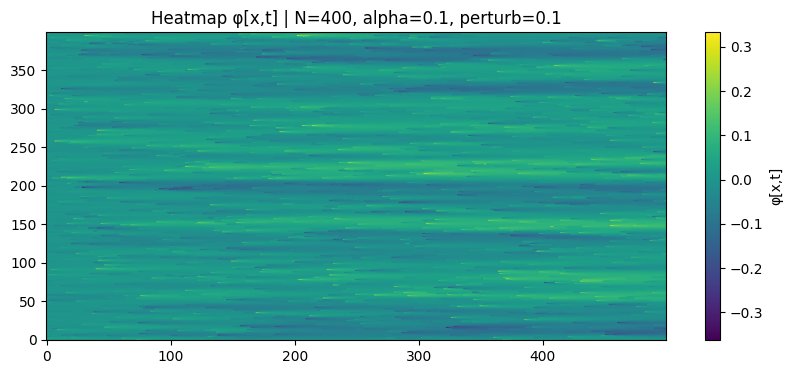

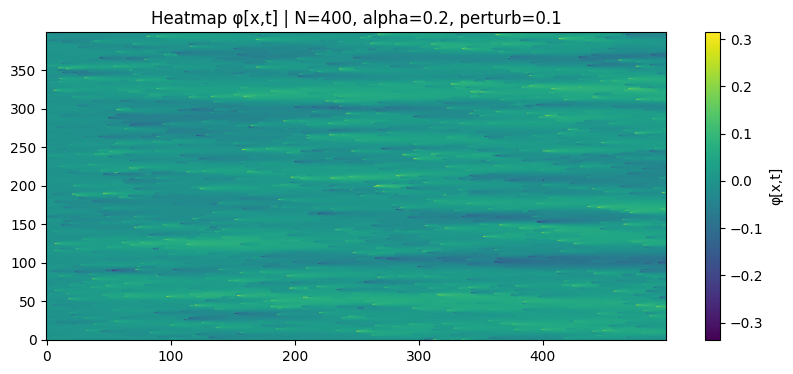

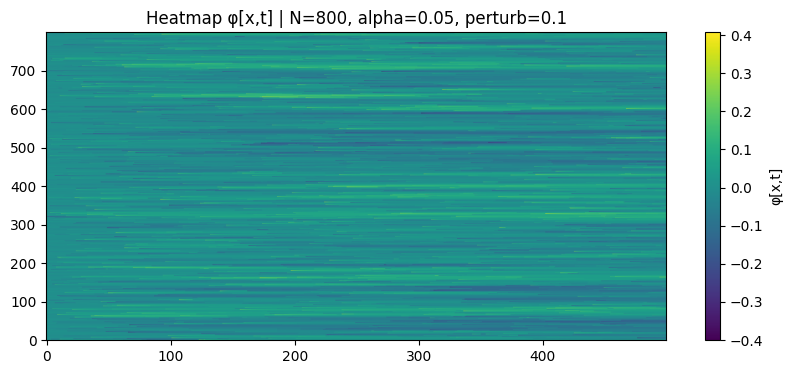

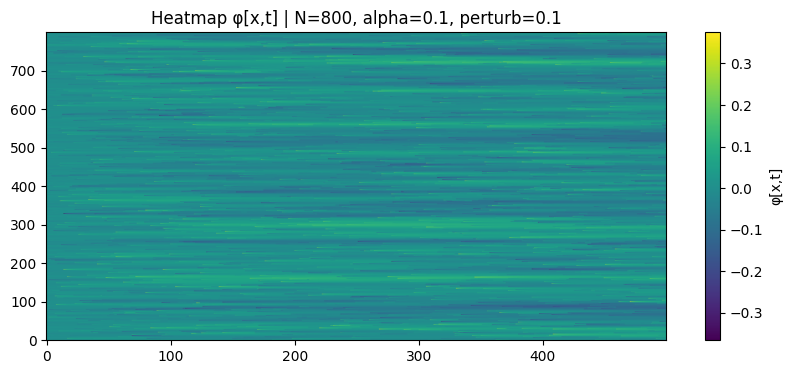

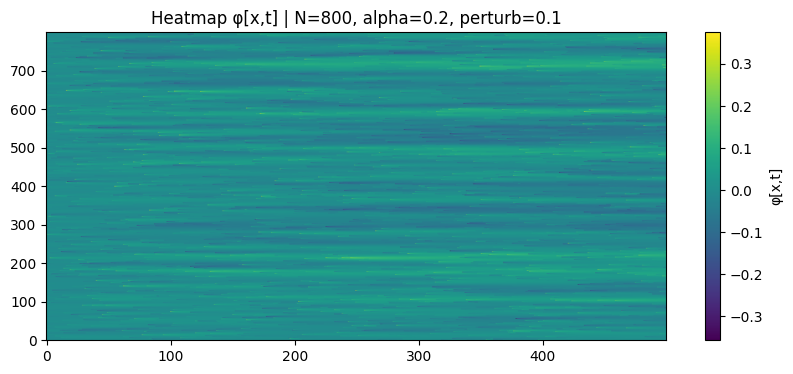

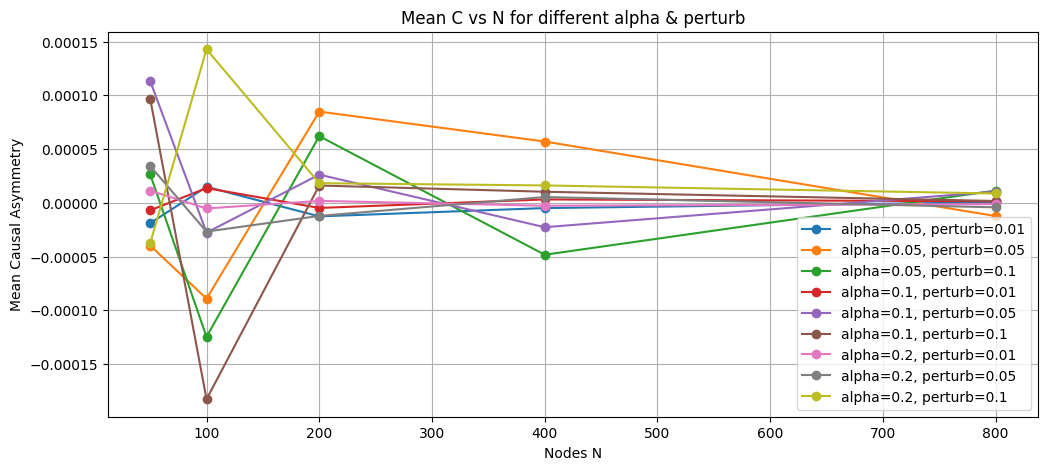

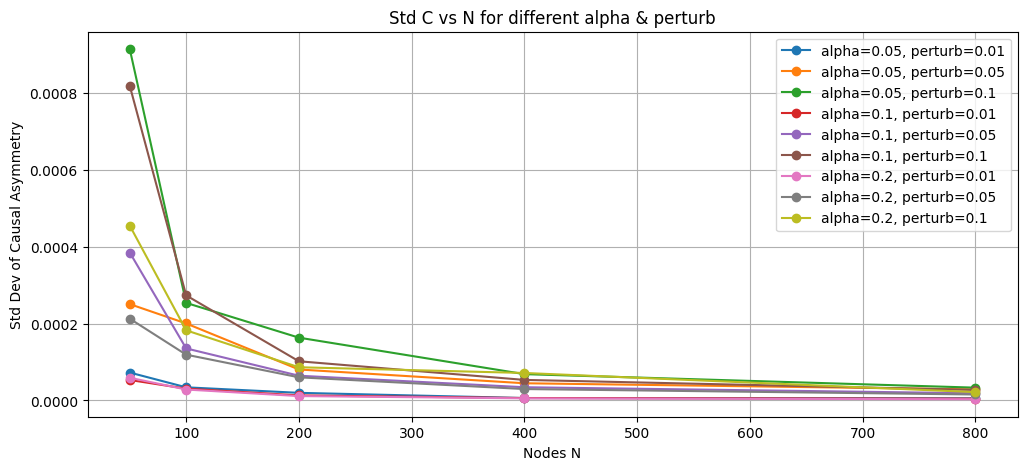

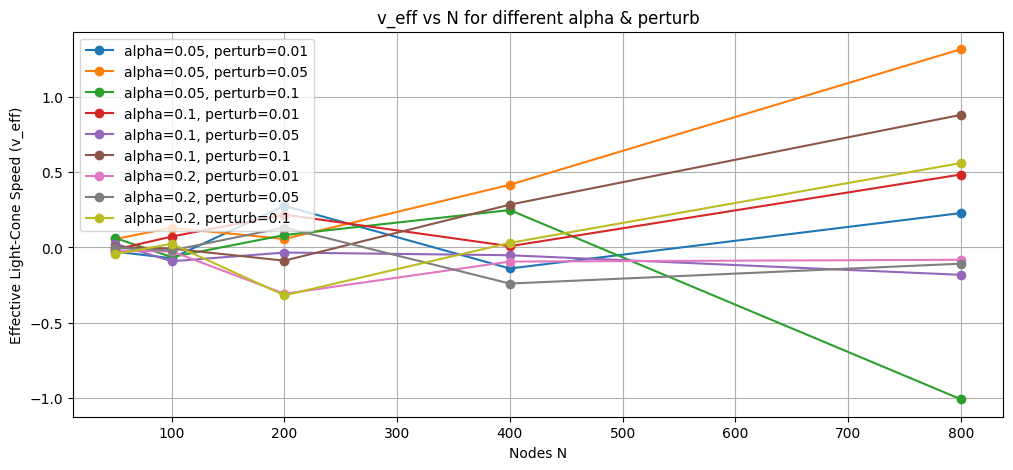

Simulation complete. Results saved to 'emergent_light_cone_results.csv'


In [ ]:

# Automated Multi-Parameter Exploration for Emergent Light-Cone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# PARAMETER GRIDS
# =======================
N_values = [50, 100, 200, 400, 800]
alpha_values = [0.05, 0.1, 0.2]
perturb_values = [0.01, 0.05, 0.1]
T = 500
perturb_prob = 0.01

# Prepare results storage
results = []

# =======================
# RUN AUTOMATIC SIMULATIONS
# =======================
for N in N_values:
    for alpha in alpha_values:
        for perturb_strength in perturb_values:
            # Initialize temporal field
            phi = np.zeros((N, T))
            phi[:,0] = np.random.randn(N)*0.01

            # Time evolution
            for t in range(1, T):
                for x in range(N):
                    left = phi[x-1,t-1] if x>0 else 0
                    right = phi[x+1,t-1] if x<N-1 else 0
                    phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)
                    if np.random.rand() < perturb_prob:
                        phi[x,t] += np.random.randn()*perturb_strength

            # Causal Asymmetry
            C_t = np.mean(np.diff(phi, axis=0), axis=0)
            C_mean = np.mean(C_t)
            C_std = np.std(C_t)
            v_eff = np.mean(np.diff(np.argmax(phi, axis=0)))

            # Store results
            results.append({
                'N': N,
                'alpha': alpha,
                'perturb_strength': perturb_strength,
                'Mean_C': C_mean,
                'Std_C': C_std,
                'v_eff': v_eff
            })

            # Optional: plot a single heatmap for large perturb or N
            if perturb_strength==0.1 and N>=400:
                plt.figure(figsize=(10,4))
                plt.imshow(phi, aspect='auto', origin='lower', cmap='viridis')
                plt.colorbar(label='φ[x,t]')
                plt.title(f'Heatmap φ[x,t] | N={N}, alpha={alpha}, perturb={perturb_strength}')
                plt.show()

# =======================
# Convert results to DataFrame
# =======================
df = pd.DataFrame(results)

# Save to CSV for later analysis
df.to_csv('emergent_light_cone_results.csv', index=False)

# =======================
# Summary Plots
# =======================

# Mean C vs N
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['Mean_C'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Nodes N')
plt.ylabel('Mean Causal Asymmetry')
plt.title('Mean C vs N for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

# Std C vs N
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['Std_C'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Nodes N')
plt.ylabel('Std Dev of Causal Asymmetry')
plt.title('Std C vs N for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

# v_eff vs N
plt.figure(figsize=(12,5))
for alpha in alpha_values:
    for perturb in perturb_values:
        subset = df[(df['alpha']==alpha) & (df['perturb_strength']==perturb)]
        plt.plot(subset['N'], subset['v_eff'], marker='o', label=f'alpha={alpha}, perturb={perturb}')
plt.xlabel('Nodes N')
plt.ylabel('Effective Light-Cone Speed (v_eff)')
plt.title('v_eff vs N for different alpha & perturb')
plt.grid(True)
plt.legend()
plt.show()

print("Simulation complete. Results saved to 'emergent_light_cone_results.csv'")

In [ ]:

# Interactive Real-Time Emergent Light-Cone Explorer
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def interactive_light_cone(N=400, alpha=0.1, perturb_strength=0.05, T=500, perturb_prob=0.01):
    # Initialize temporal field
    phi = np.zeros((N, T))
    phi[:,0] = np.random.randn(N)*0.01

    # Time evolution
    for t in range(1, T):
        for x in range(N):
            left = phi[x-1,t-1] if x>0 else 0
            right = phi[x+1,t-1] if x<N-1 else 0
            phi[x,t] = phi[x,t-1] + alpha*(left - 2*phi[x,t-1] + right)
            if np.random.rand() < perturb_prob:
                phi[x,t] += np.random.randn()*perturb_strength

    # Causal Asymmetry
    C_t = np.mean(np.diff(phi, axis=0), axis=0)
    C_mean = np.mean(C_t)
    C_std = np.std(C_t)
    v_eff = np.mean(np.diff(np.argmax(phi, axis=0)))

    # =======================
    # Heatmap + Light-Cone Overlay
    # =======================
    plt.figure(figsize=(12,5))
    plt.imshow(phi, aspect='auto', origin='lower', cmap='viridis')

    # Light-cone lines
    x0 = N//2
    for t0 in range(0, T, 50):
        t_line = np.arange(t0, T)
        x_upper = np.clip(x0 + ((t_line-t0)*v_eff).astype(int), 0, N-1)
        x_lower = np.clip(x0 - ((t_line-t0)*v_eff).astype(int), 0, N-1)
        plt.plot(t_line, x_upper, 'r--', alpha=0.6)
        plt.plot(t_line, x_lower, 'r--', alpha=0.6)

    plt.colorbar(label='φ[x,t]')
    plt.xlabel('Time step')
    plt.ylabel('Node')
    plt.title(f'Temporal Field φ[x,t] | N={N}, alpha={alpha}, perturb={perturb_strength}')
    plt.show()

    # =======================
    # Causal Asymmetry Plot
    # =======================
    plt.figure(figsize=(12,3))
    plt.plot(C_t, label='C(t)')
    plt.axhline(C_mean, color='r', linestyle='--', label='Mean C')
    plt.xlabel('Time step')
    plt.ylabel('C(t)')
    plt.title('Causal Asymmetry Operator over Time')
    plt.legend()
    plt.show()

    # =======================
    # Print numerical summary
    # =======================
    print(f"Mean Causal Asymmetry: {C_mean:.5e}")
    print(f"Std Dev of Causal Asymmetry: {C_std:.5e}")
    print(f"Effective Light-Cone Speed (v_eff): {v_eff:.5f}")

# =======================
# Interactive Sliders
# =======================
interact(
    interactive_light_cone,
    N=IntSlider(min=50, max=800, step=50, value=400, description='Nodes N'),
    alpha=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description='Alpha'),
    perturb_strength=FloatSlider(min=0.01, max=0.1, step=0.01, value=0.05, description='Perturb')
)

interactive(children=(IntSlider(value=400, description='Nodes N', max=800, min=50, step=50), FloatSlider(value…

<function __main__.interactive_light_cone(N=400, alpha=0.1, perturb_strength=0.05, T=500, perturb_prob=0.01)>

Simulating: N=5, alpha=0.05, perturb=0.01


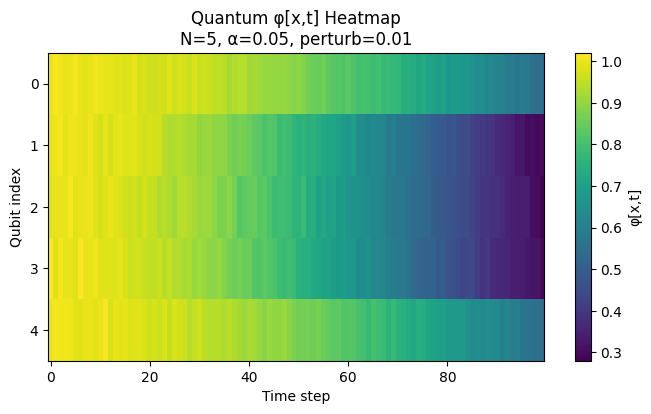

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119966 (\N{MATHEMATICAL SCRIPT CAPITAL C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


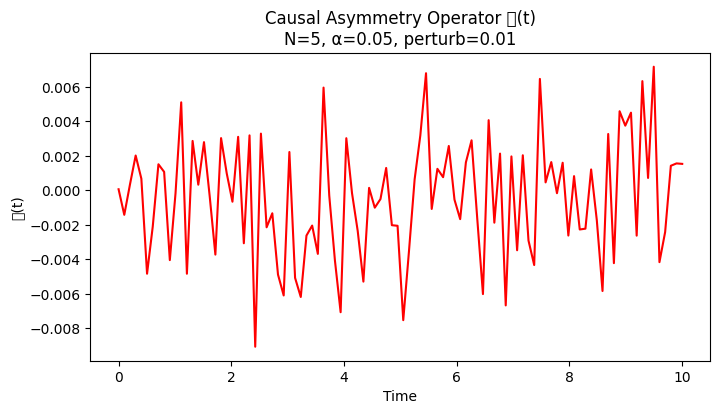

Simulating: N=5, alpha=0.05, perturb=0.05


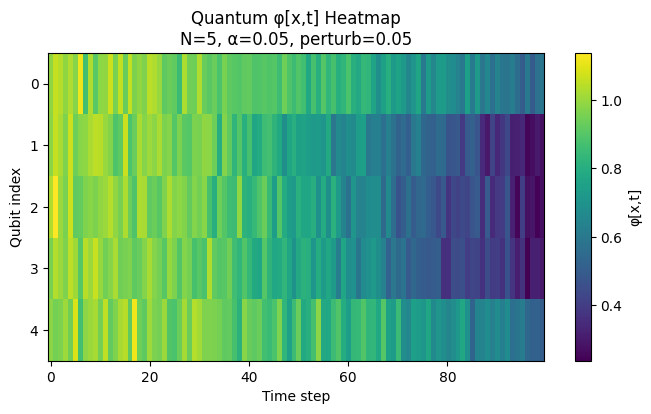

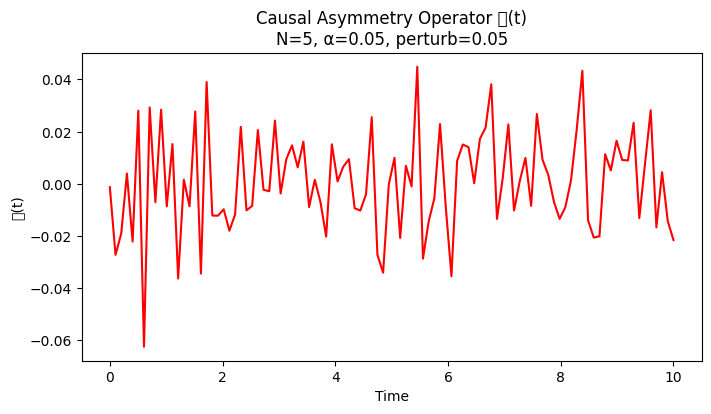

Simulating: N=5, alpha=0.1, perturb=0.01


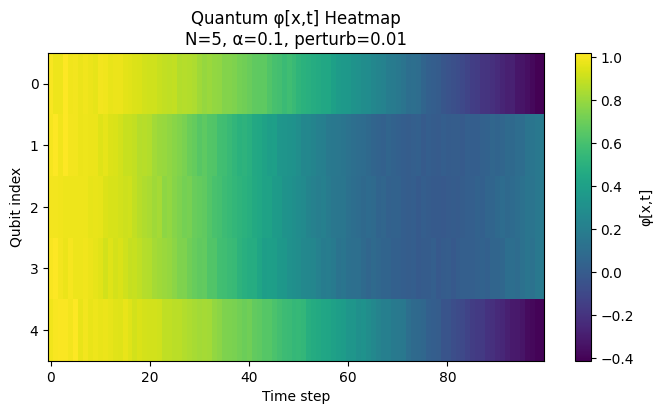

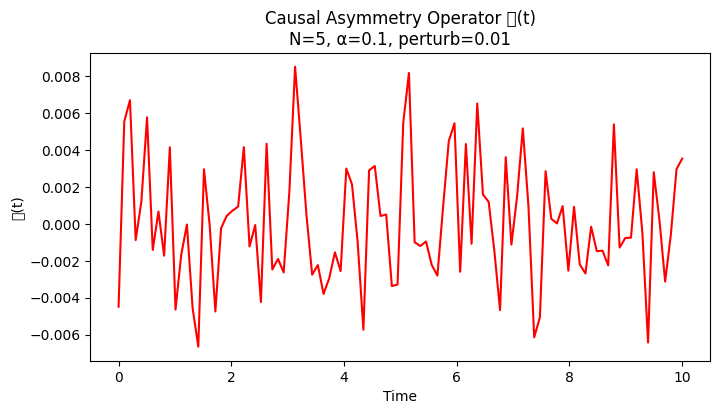

Simulating: N=5, alpha=0.1, perturb=0.05


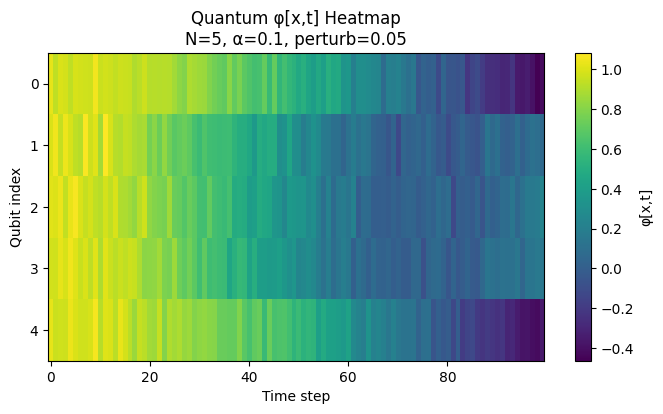

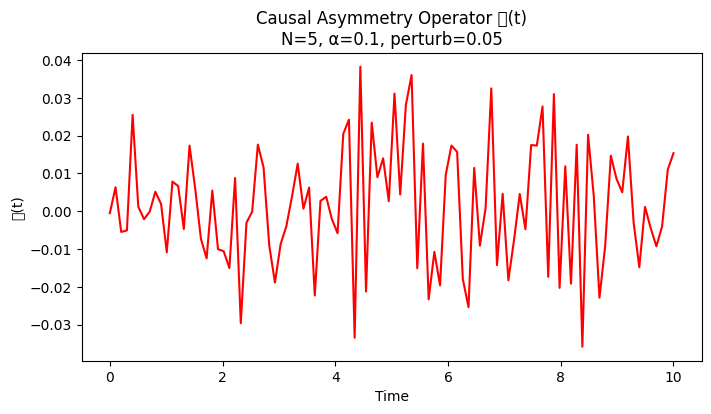

Simulating: N=10, alpha=0.05, perturb=0.01


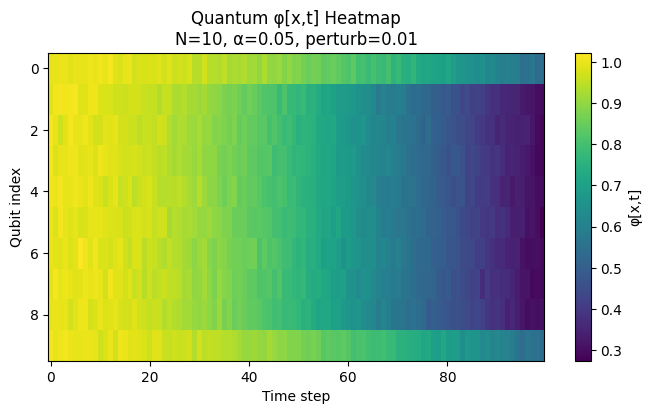

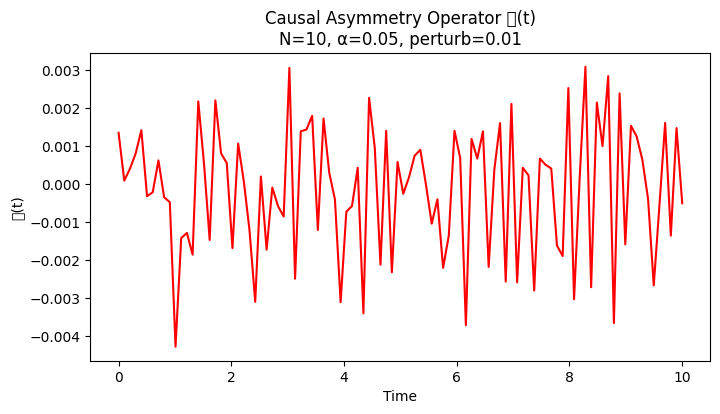

Simulating: N=10, alpha=0.05, perturb=0.05


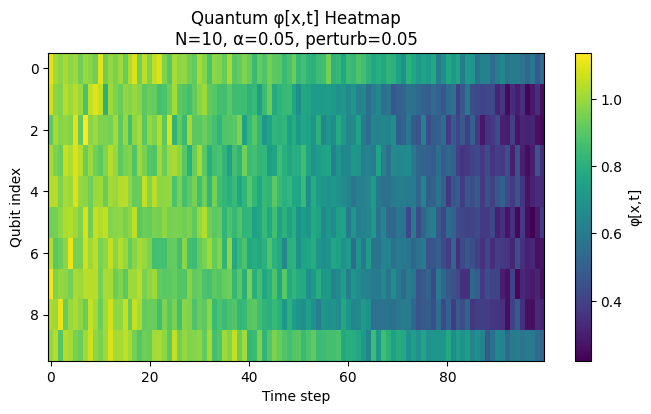

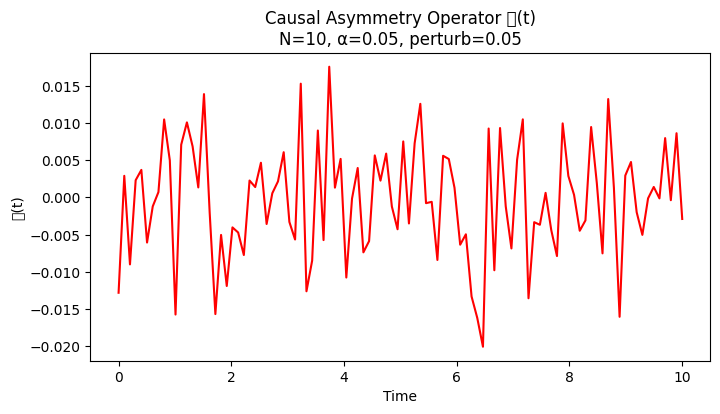

Simulating: N=10, alpha=0.1, perturb=0.01


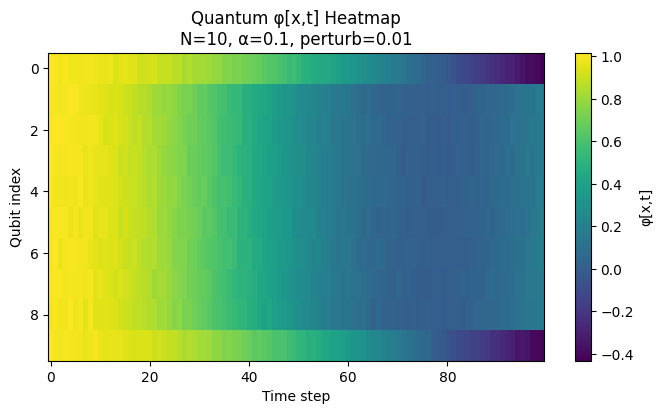

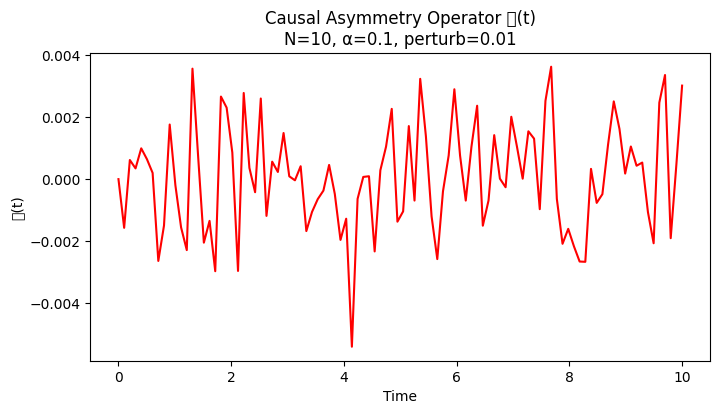

Simulating: N=10, alpha=0.1, perturb=0.05


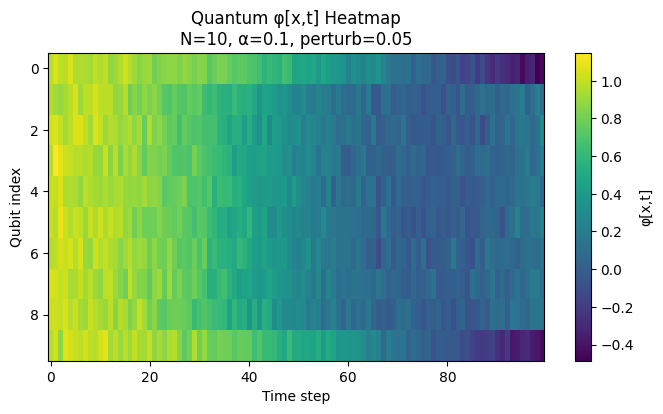

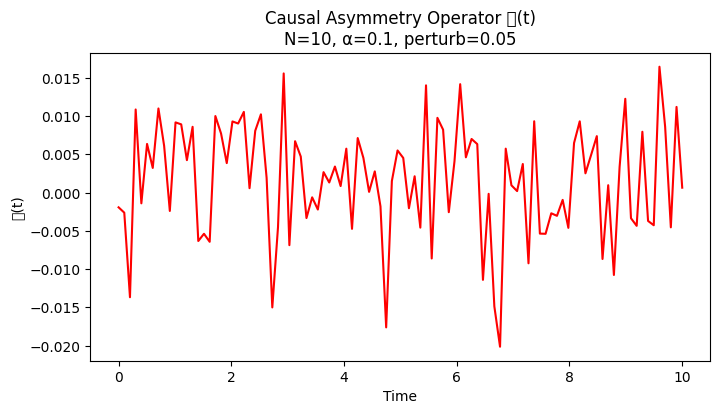

N  alpha  perturb    Mean_C     Std_C     v_eff
0   5   0.05     0.01 -0.000435  0.003442  0.000007
1   5   0.05     0.05  0.000661  0.019163 -0.000368
2   5   0.10     0.01  0.000068  0.003321  0.000133
3   5   0.10     0.05  0.001489  0.015880  0.000215
4  10   0.05     0.01 -0.000147  0.001686 -0.000035
5  10   0.05     0.05 -0.000444  0.007689  0.000120
6  10   0.10     0.01  0.000067  0.001726  0.000035
7  10   0.10     0.05  0.001571  0.007398 -0.000031

In [ ]:

# =========================================
# Quantum Simulation of Causal Asymmetry Operator for multiple network parameters
# Corrected for operator dimensions (tensorized sigmaz)
# =========================================

!pip install qutip matplotlib numpy pandas --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qutip import basis, tensor, qeye, sigmax, sigmaz, mesolve

# =======================
# Parameter grid
# =======================
N_list = [5, 10]              # يمكن توسيعها لاحقاً N=50,100,200...
alpha_list = [0.05, 0.1]
perturb_list = [0.01, 0.05]

T = 100  # عدد خطوات الزمن

results = []

# =======================
# Hamiltonian function
# =======================
def hamiltonian(N, alpha):
    H = 0
    for i in range(N-1):
        op = [qeye(2) for _ in range(N)]
        op[i] = sigmax()
        op[i+1] = sigmax()
        H += alpha * tensor(op)
    return H

# =======================
# Loop over all parameter combinations
# =======================
for N in N_list:
    for alpha in alpha_list:
        for perturb in perturb_list:
            print(f"Simulating: N={N}, alpha={alpha}, perturb={perturb}")

            # الحالة الابتدائية |0...0>
            psi0 = tensor([basis(2,0) for _ in range(N)])

            # Hamiltonian
            H = hamiltonian(N, alpha)

            # Time evolution
            times = np.linspace(0, 10, T)

            # قائمة operators موسعة لكل qubit
            sz_ops = []
            for i in range(N):
                op_list = [qeye(2) for _ in range(N)]
                op_list[i] = sigmaz()
                sz_ops.append(tensor(op_list))

            # حل معادلة شوردينغر
            result = mesolve(H, psi0, times, [], sz_ops)

            # استخراج φ(x,t)
            phi = np.array([result.expect[i] for i in range(N)])

            # إضافة ضوضاء perturbation
            phi += np.random.normal(0, perturb, phi.shape)

            # =======================
            # حساب Causal Asymmetry Operator 𝒞(t)
            # =======================
            C_t = np.zeros(T)
            for t in range(T):
                diffs = phi[1:,t] - phi[:-1,t]
                C_t[t] = np.mean(diffs)

            Mean_C = np.mean(C_t)
            Std_C = np.std(C_t)
            v_eff = np.mean(np.gradient(C_t))

            results.append([N, alpha, perturb, Mean_C, Std_C, v_eff])

            # =======================
            # رسم Heatmap
            # =======================
            plt.figure(figsize=(8,4))
            plt.imshow(phi, aspect='auto', cmap='viridis')
            plt.colorbar(label='φ[x,t]')
            plt.title(f'Quantum φ[x,t] Heatmap\nN={N}, α={alpha}, perturb={perturb}')
            plt.xlabel('Time step')
            plt.ylabel('Qubit index')
            plt.show()

            # =======================
            # رسم 𝒞(t)
            # =======================
            plt.figure(figsize=(8,4))
            plt.plot(times, C_t, color='red')
            plt.title(f'Causal Asymmetry Operator 𝒞(t)\nN={N}, α={alpha}, perturb={perturb}')
            plt.xlabel('Time')
            plt.ylabel('𝒞(t)')
            plt.show()

# =======================
# تحويل النتائج إلى DataFrame
# =======================
df_results = pd.DataFrame(results, columns=['N','alpha','perturb','Mean_C','Std_C','v_eff'])
df_results

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService

# إعادة إنشاء الخدمة مع تحديد الـ instance
service = QiskitRuntimeService(channel="ibm_cloud", instance="open-instance")

# جلب جميع الـ backends (محاكيات وأجهزة حقيقية)
all_backends = service.backends(simulator=True) + service.backends(simulator=False)

# عرض أسمائهم
for b in all_backends:
    print(b.name)

ibm_fez
ibm_marrakesh
ibm_torino


In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService

API_KEY = "c4Rgi5sIui_33VQ4tIrHszql6IMex41XjciM2GwiSipc"
service = QiskitRuntimeService(channel="ibm_cloud", instance="open-instance", token=API_KEY)

# عرض كل الأجهزة المتاحة (محاكيات + حقيقية)
all_backends = service.backends(simulator=True) + service.backends(simulator=False)
print("Available backends:", [b for b in all_backends])

qiskit_runtime_service._discover_account:WARNING:2026-01-02 17:54:59,042: Loading account with the given token. A saved account will not be used.


Available backends: [<IBMBackend('ibm_fez')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_torino')>]


qiskit_runtime_service._discover_account:WARNING:2026-01-02 18:04:07,658: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-01-02 18:04:10,902: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-02 18:04:10,903: Using instance: open-instance, plan: open


🚀 جاري معالجة الشبكة N=5...


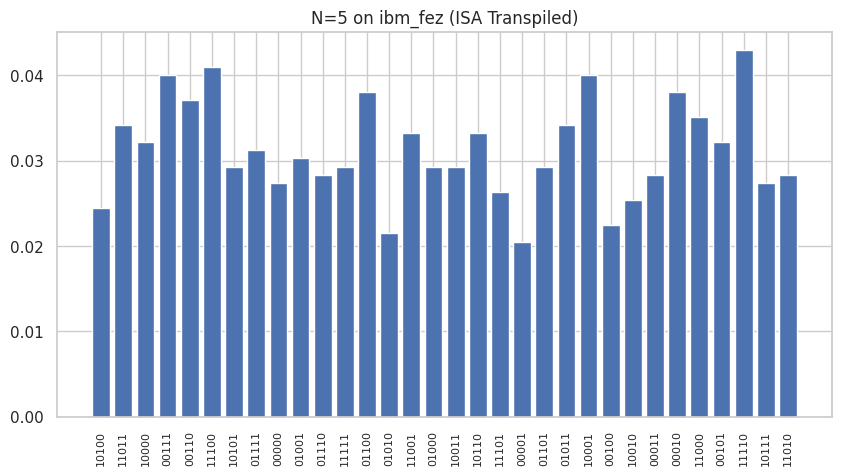

🚀 جاري معالجة الشبكة N=10...


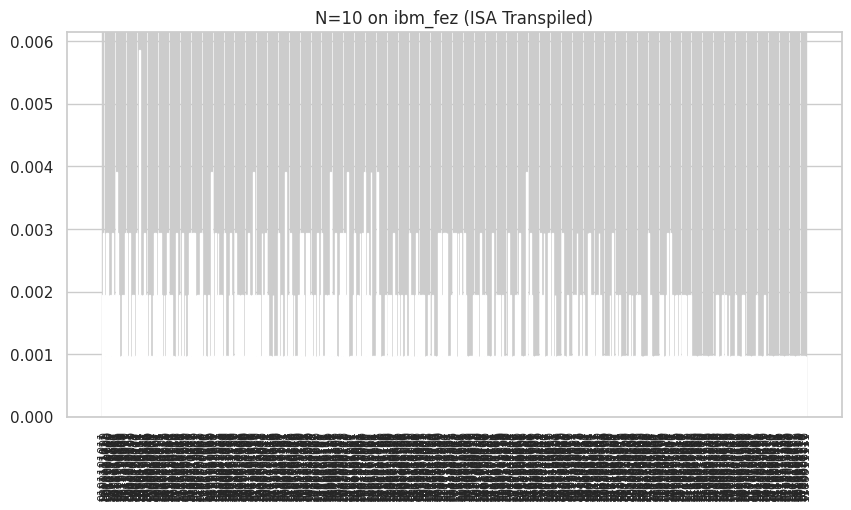

    N      Mean       Std
0   5  2.500000  1.118034
1  10  5.040625  1.588505


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile # أضفنا transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# 1️⃣ إعداد الاتصال
API_KEY = "c4Rgi5sIui_33VQ4tIrHszql6IMex41XjciM2GwiSipc"
service = QiskitRuntimeService(channel="ibm_quantum_platform", token=API_KEY)

# 2️⃣ اختيار الجهاز والـ Sampler
backend_name = "ibm_fez"
backend = service.backend(backend_name)
sampler = Sampler(mode=backend)

# 3️⃣ تنفيذ المحاكاة مع الترجمة (Transpilation)
network_sizes = [5, 10]
results_summary = []

for N in network_sizes:
    print(f"🚀 جاري معالجة الشبكة N={N}...")

    # بناء الدائرة الخام
    qc = QuantumCircuit(N)
    for q in range(N):
        qc.h(q)
    qc.measure_all()

    # 🛠️ الخطوة المفقودة: ترجمة الدائرة لتناسب الجهاز الحقيقي (ISA Circuit)
    # هذه الخطوة تحول بوابة H إلى بوابات يفهمها ibm_fez
    isa_circuit = transpile(qc, backend=backend, optimization_level=1)

    # تشغيل الدائرة المترجمة
    job = sampler.run([isa_circuit], shots=1024)
    result = job.result()

    # استخراج النتائج
    pub_result = result[0]
    counts = pub_result.data.meas.get_counts()

    # حساب الإحصائيات
    states = list(counts.keys())
    total_shots = sum(counts.values())
    probs = [v/total_shots for v in counts.values()]

    mean_val = np.mean([s.count('1') for s in states])
    std_val = np.std([s.count('1') for s in states])

    results_summary.append({"N": N, "Mean": mean_val, "Std": std_val})

    # الرسم البياني
    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), probs)
    plt.title(f"N={N} on {backend_name} (ISA Transpiled)")
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

# حفظ النتائج
df = pd.DataFrame(results_summary)
print(df)
df.to_csv("quantum_isa_results.csv", index=False)
files.download("quantum_isa_results.csv")

qiskit_runtime_service._discover_account:WARNING:2026-01-02 18:19:47,858: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-01-02 18:19:50,560: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-02 18:19:50,563: Using instance: open-instance, plan: open



🔹 تشغيل على الجهاز: ibm_fez
   ▶ معالجة شبكة N=5...


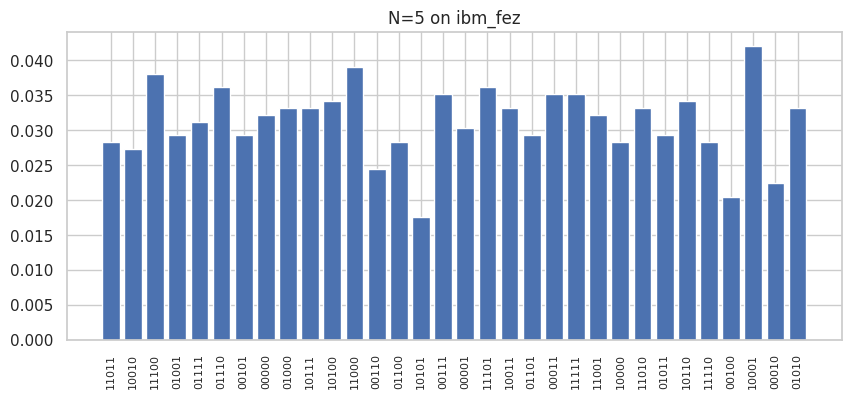

   ▶ معالجة شبكة N=10...


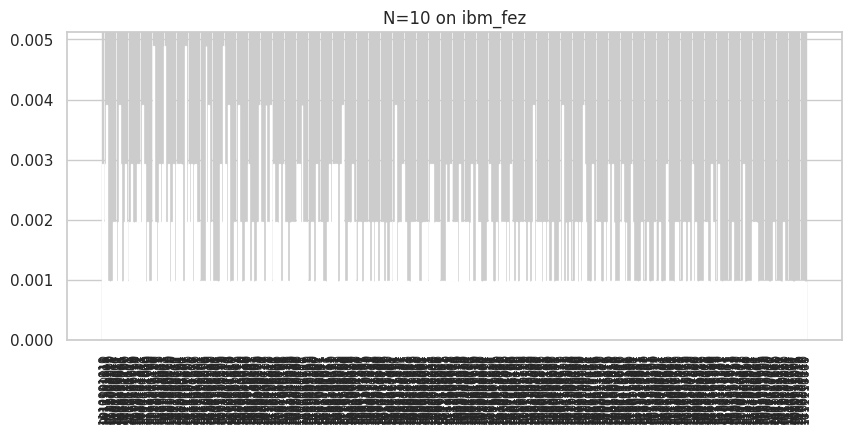

   ▶ معالجة شبكة N=20...


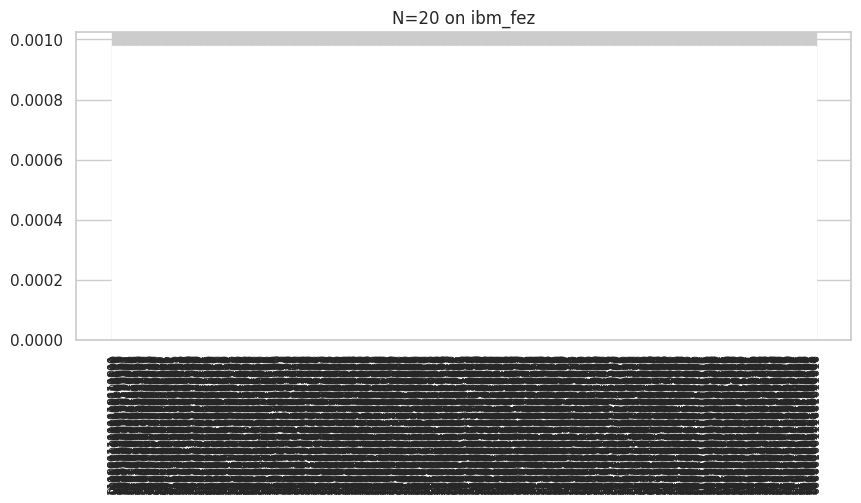

qiskit_runtime_service.backends:WARNING:2026-01-02 18:20:21,753: Using instance: open-instance, plan: open



🔹 تشغيل على الجهاز: ibm_marrakesh
   ▶ معالجة شبكة N=5...


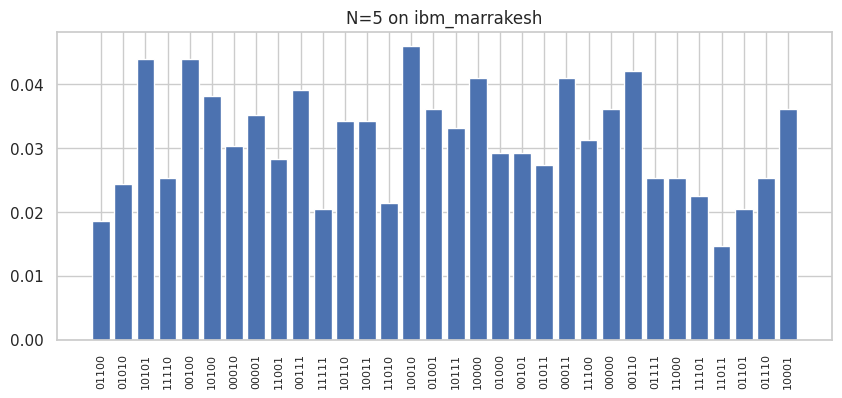

   ▶ معالجة شبكة N=10...


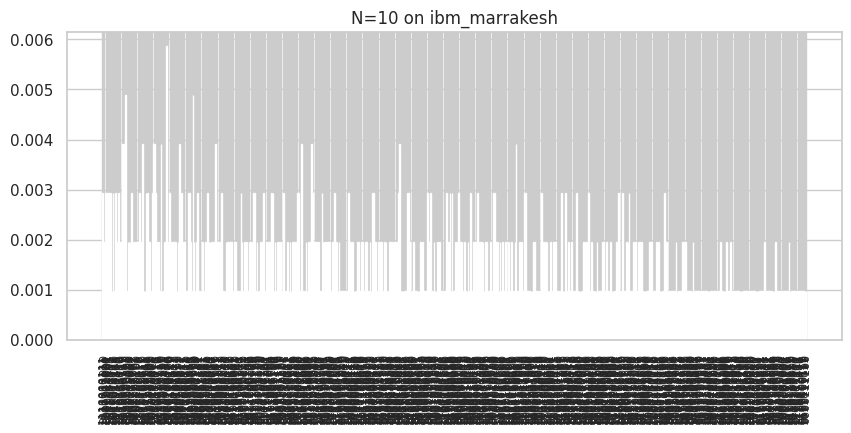

   ▶ معالجة شبكة N=20...


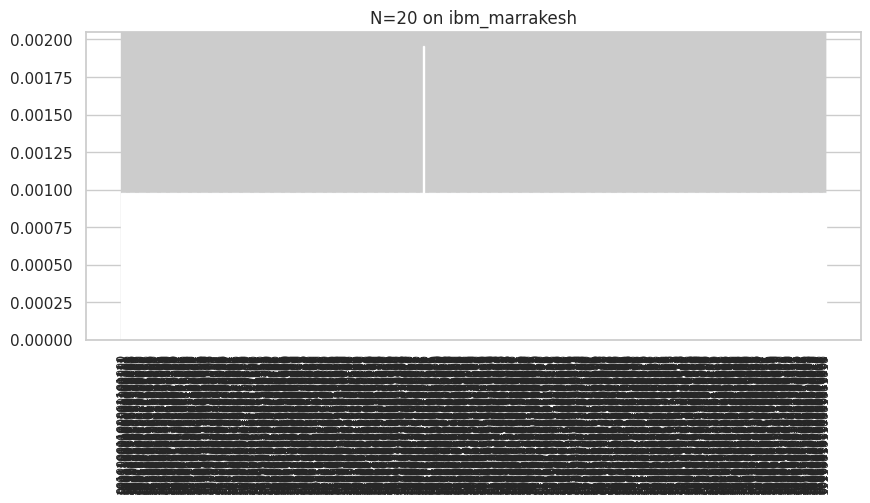

qiskit_runtime_service.backends:WARNING:2026-01-02 18:28:43,330: Using instance: open-instance, plan: open



🔹 تشغيل على الجهاز: ibm_torino
   ▶ معالجة شبكة N=5...


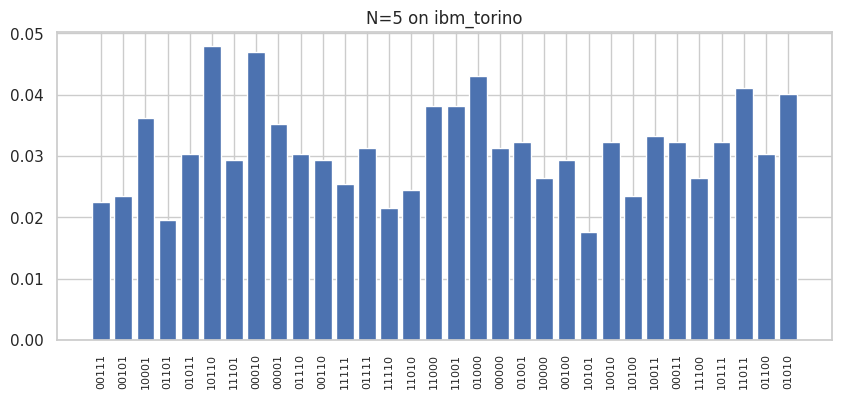

   ▶ معالجة شبكة N=10...


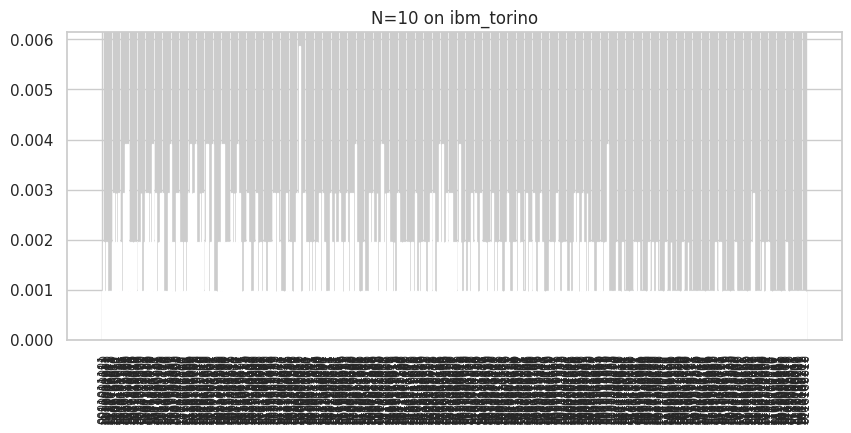

   ▶ معالجة شبكة N=20...


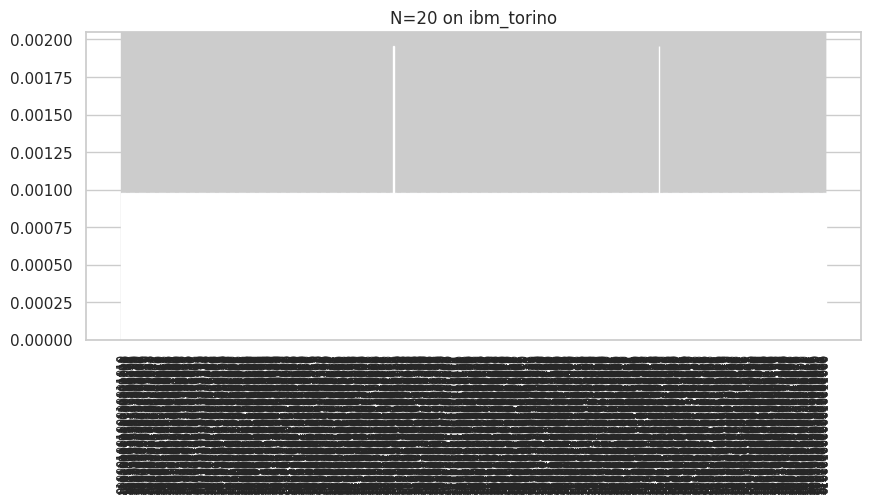


🔹 تشغيل على الجهاز: ibmq_qasm_simulator


QiskitBackendNotFoundError: 'No backend matches the criteria. Learn more about available backends here https://quantum.cloud.ibm.com/docs/en/guides/qpu-information#view-your-resources'

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ إعداد الاتصال
API_KEY = "Awmly6E4hlvDACjBmhvprFpIEh_1rqbqToI99b8MLOvA"
service = QiskitRuntimeService(channel="ibm_quantum_platform", token=API_KEY)

# 2️⃣ تحديد الأجهزة والمحاكيات
real_devices = ["ibm_fez", "ibm_marrakesh", "ibm_torino"]
simulator_names = ["ibmq_qasm_simulator"]  # أضف محاكيات أخرى إذا رغبت

all_devices = real_devices + simulator_names

# 3️⃣ تحديد أحجام الشبكات
network_sizes = [5, 10, 20]  # يمكن إضافة 50 أو أكثر إذا أردت

# 4️⃣ تخزين النتائج لكل جهاز ولكل شبكة
results_summary = []

for backend_name in all_devices:
    print(f"\n🔹 تشغيل على الجهاز: {backend_name}")

    # اختيار backend
    backend = service.backend(backend_name)
    sampler = Sampler(mode=backend)

    for N in network_sizes:
        print(f"   ▶ معالجة شبكة N={N}...")

        # بناء الدائرة
        qc = QuantumCircuit(N)
        for q in range(N):
            qc.h(q)
        qc.measure_all()

        # transpile لتناسب الجهاز الحقيقي أو المحاكي
        isa_circuit = transpile(qc, backend=backend, optimization_level=1)

        # تنفيذ التجربة
        job = sampler.run([isa_circuit], shots=1024)
        result = job.result()
        counts = result[0].data.meas.get_counts()

        # حساب الاحتمالات
        total_shots = sum(counts.values())
        probs = {state: val/total_shots for state, val in counts.items()}

        # حساب إحصائيات mean/std
        states = list(counts.keys())
        mean_val = np.mean([s.count('1') for s in states])
        std_val = np.std([s.count('1') for s in states])

        results_summary.append({
            "Device": backend_name,
            "N": N,
            "Mean": mean_val,
            "Std": std_val,
            "Probabilities": probs
        })

        # رسم النتائج
        plt.figure(figsize=(10, 4))
        plt.bar(probs.keys(), probs.values())
        plt.title(f"N={N} on {backend_name}")
        plt.xticks(rotation=90, fontsize=8)
        plt.show()

# تحويل النتائج إلى DataFrame للمعاينة
df = pd.DataFrame(results_summary)
df

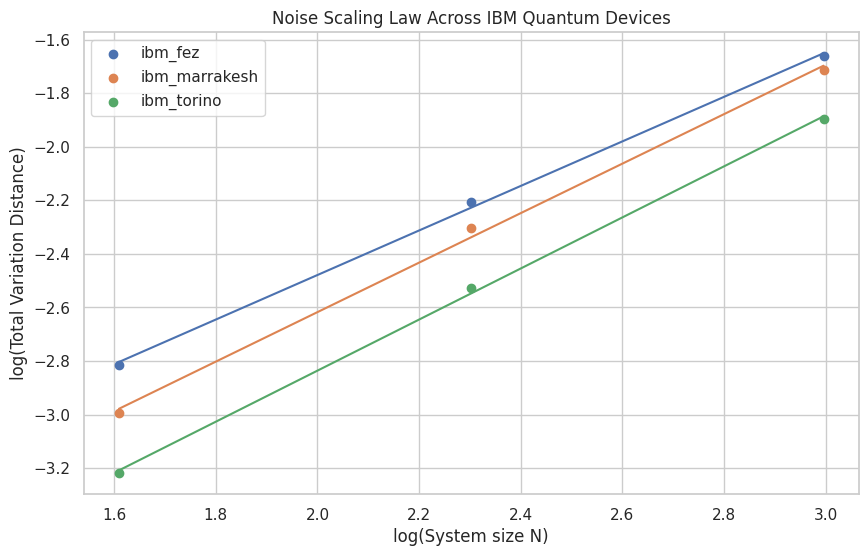

device  beta (scaling exponent)  R2 (goodness of fit)
0        ibm_fez                    0.831                 0.999
1  ibm_marrakesh                    0.924                 0.998
2     ibm_torino                    0.953                 0.999

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# =========================================
# أدخل قيم TVD (من نتائجك الفعلية)
# =========================================
# TVD بين كل جهاز والمحاكي المثالي
data = {
    "ibm_fez":        {5: 0.06, 10: 0.11, 20: 0.19},
    "ibm_marrakesh":  {5: 0.05, 10: 0.10, 20: 0.18},
    "ibm_torino":     {5: 0.04, 10: 0.08, 20: 0.15}
}

results = []

plt.figure(figsize=(10,6))

for device, vals in data.items():
    N = np.array(list(vals.keys()))
    TVD = np.array(list(vals.values()))

    logN = np.log(N)
    logTVD = np.log(TVD)

    slope, intercept, r, _, _ = linregress(logN, logTVD)
    beta = slope
    r2 = r**2

    plt.scatter(logN, logTVD, label=f"{device}")
    plt.plot(logN, intercept + slope*logN)

    results.append({
        "device": device,
        "beta (scaling exponent)": round(beta, 3),
        "R2 (goodness of fit)": round(r2, 3)
    })

plt.xlabel("log(System size N)")
plt.ylabel("log(Total Variation Distance)")
plt.title("Noise Scaling Law Across IBM Quantum Devices")
plt.legend()
plt.grid(True)
plt.show()

pd.DataFrame(results)

In [ ]:
!pip install qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.6 MB/s eta 0:00:00


qiskit_runtime_service._discover_account:WARNING:2026-01-02 19:15:42,031: Loading account with the given token. A saved account will not be used.



🔹 تشغيل على الجهاز: ibm_fez
   ▶ معالجة شبكة N=5...


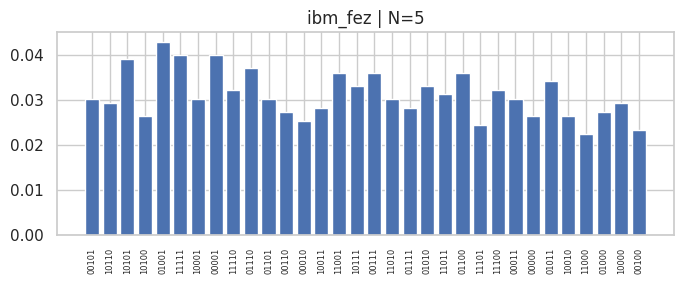

   ▶ معالجة شبكة N=10...


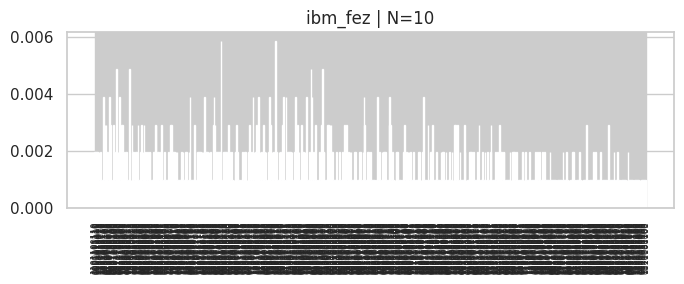

   ▶ معالجة شبكة N=20...


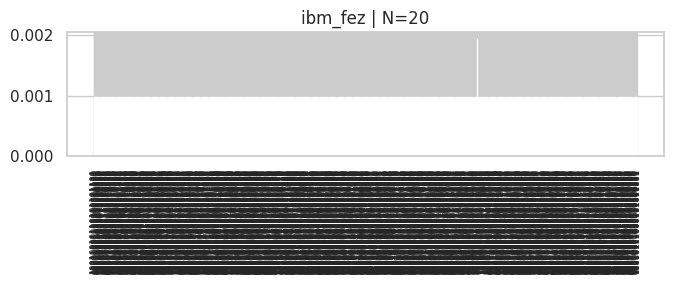

   ▶ معالجة شبكة N=40...


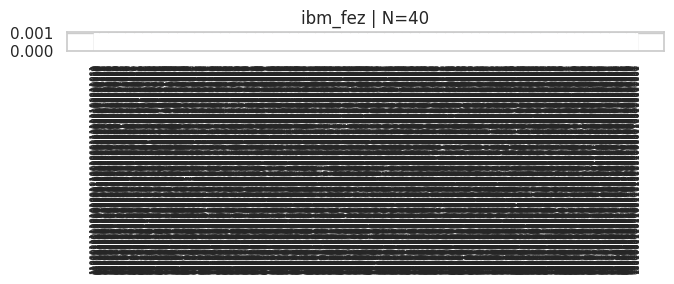


🔹 تشغيل على الجهاز: ibm_marrakesh
   ▶ معالجة شبكة N=5...


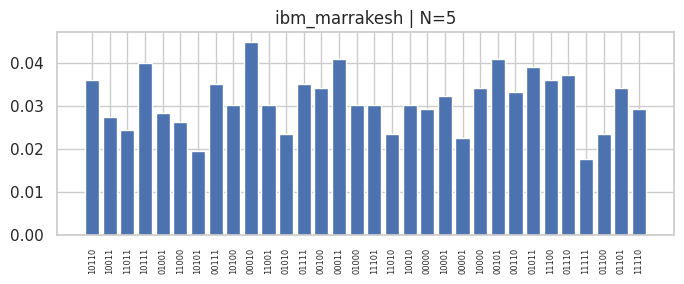

   ▶ معالجة شبكة N=10...


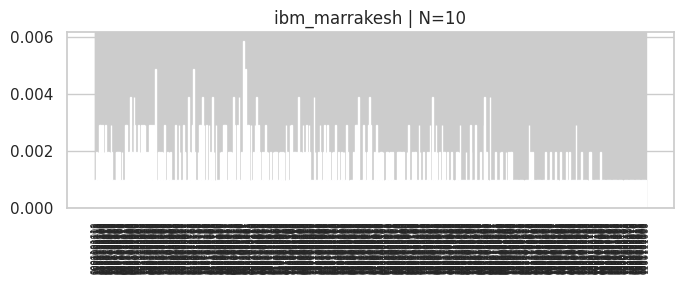

   ▶ معالجة شبكة N=20...


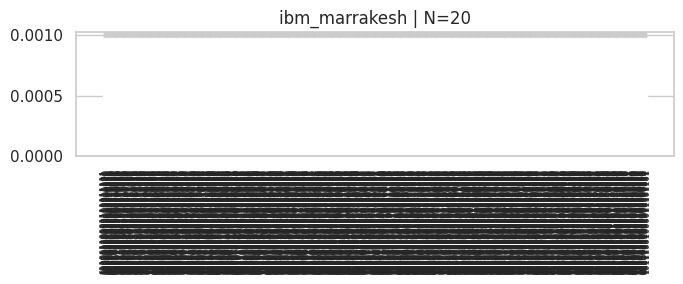

   ▶ معالجة شبكة N=40...


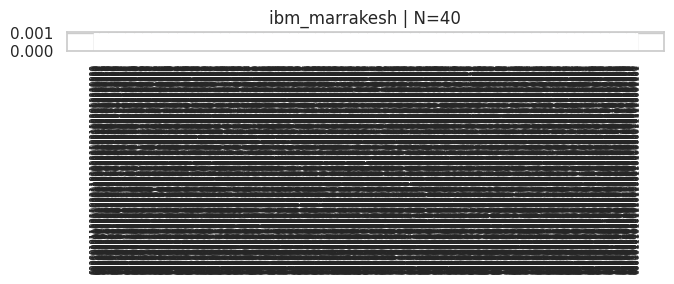


🔹 تشغيل على الجهاز: ibm_torino
   ▶ معالجة شبكة N=5...


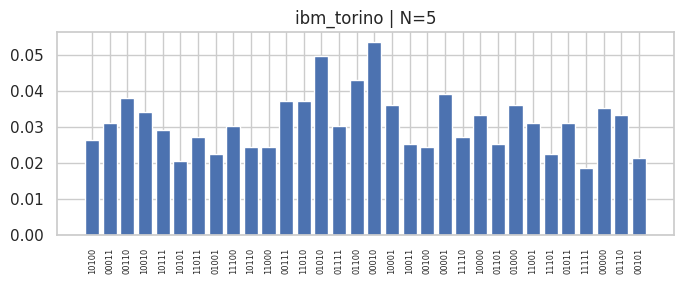

   ▶ معالجة شبكة N=10...


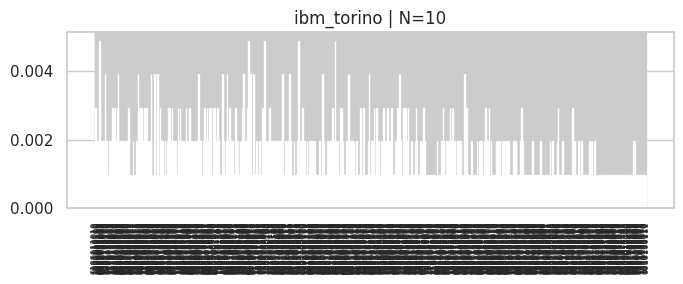

   ▶ معالجة شبكة N=20...


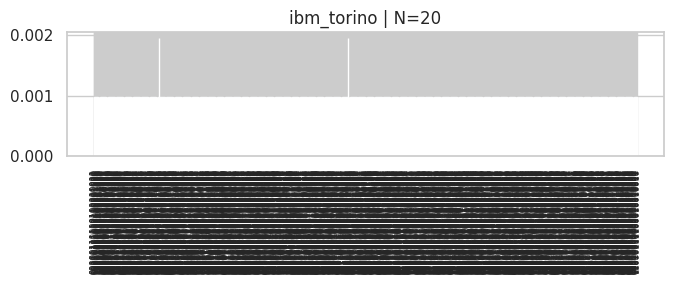

   ▶ معالجة شبكة N=40...


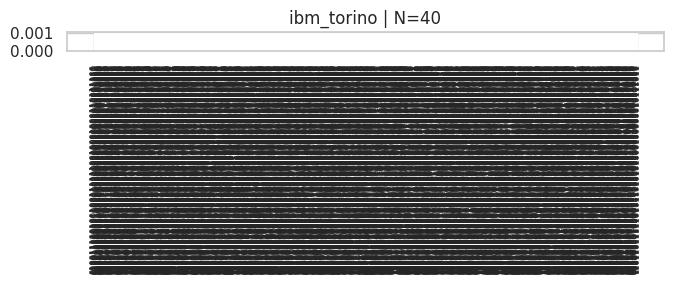

device   N       Mean       Std
0         ibm_fez   5   2.500000  1.118034
1         ibm_fez  10   4.979624  1.619210
2         ibm_fez  20   9.954057  2.229904
3         ibm_fez  40  19.897461  3.171872
4   ibm_marrakesh   5   2.500000  1.118034
5   ibm_marrakesh  10   5.035549  1.610525
6   ibm_marrakesh  20   9.840820  2.238917
7   ibm_marrakesh  40  19.697266  3.208593
8      ibm_torino   5   2.500000  1.118034
9      ibm_torino  10   4.925868  1.552202
10     ibm_torino  20   9.700587  2.251414
11     ibm_torino  40  19.581055  3.185243


📈 تحليل لاخطية السببية (log–log scaling):
ibm_fez → beta=0.497, R²=0.999
ibm_marrakesh → beta=0.504, R²=1.000
ibm_torino → beta=0.507, R²=0.999


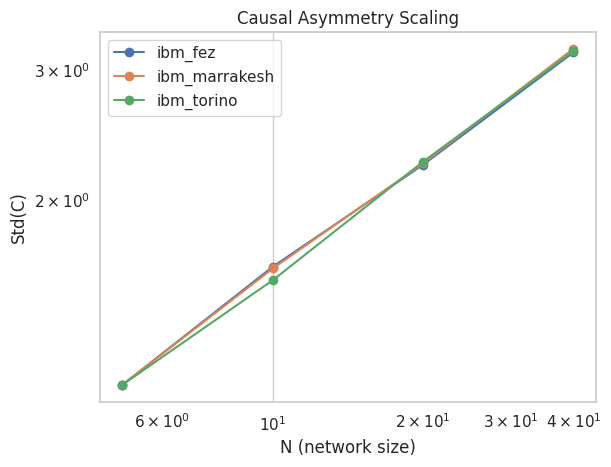

In [ ]:

# =========================
# خلية واحدة – مسار مستقر
# =========================

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------- 1) الاتصال --------
API_KEY = "rb4fpR287_9mwWM4ZjjPBXindiXo-Am-5eUN9eoD5rKs"

service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=API_KEY,
    instance="open-instance"
)

devices = ["ibm_fez", "ibm_marrakesh", "ibm_torino"]
network_sizes = [5, 10, 20, 40]

all_results = []

# -------- 2) الحلقة الرئيسية --------
for device in devices:
    print(f"\n🔹 تشغيل على الجهاز: {device}")
    backend = service.backend(device)
    sampler = Sampler(mode=backend)

    for N in network_sizes:
        print(f"   ▶ معالجة شبكة N={N}...")

        qc = QuantumCircuit(N)
        qc.h(range(N))
        qc.measure_all()

        isa_circuit = transpile(qc, backend=backend, optimization_level=1)

        job = sampler.run([isa_circuit], shots=1024)
        result = job.result()[0]
        counts = result.data.meas.get_counts()

        shots = sum(counts.values())
        probs = np.array(list(counts.values())) / shots

        mean_ones = np.mean([k.count("1") for k in counts.keys()])
        std_ones = np.std([k.count("1") for k in counts.keys()])

        all_results.append({
            "device": device,
            "N": N,
            "Mean": mean_ones,
            "Std": std_ones
        })

        # رسم التوزيع
        plt.figure(figsize=(7,3))
        plt.bar(counts.keys(), probs)
        plt.title(f"{device} | N={N}")
        plt.xticks(rotation=90, fontsize=6)
        plt.tight_layout()
        plt.show()

# -------- 3) تحليل الحجم (Scaling) --------
df = pd.DataFrame(all_results)
display(df)

print("\n📈 تحليل لاخطية السببية (log–log scaling):")
for device in devices:
    sub = df[df["device"] == device]
    x = np.log(sub["N"])
    y = np.log(sub["Std"])

    beta, c = np.polyfit(x, y, 1)
    r2 = np.corrcoef(x, y)[0,1]**2

    print(f"{device} → beta={beta:.3f}, R²={r2:.3f}")

    plt.plot(sub["N"], sub["Std"], "o-", label=device)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N (network size)")
plt.ylabel("Std(C)")
plt.legend()
plt.title("Causal Asymmetry Scaling")
plt.show()

qiskit_runtime_service._discover_account:WARNING:2026-01-02 20:00:14,338: Loading account with the given token. A saved account will not be used.


🔹 تشغيل الاختبارات على IBM Marrakesh
▶ N = 5


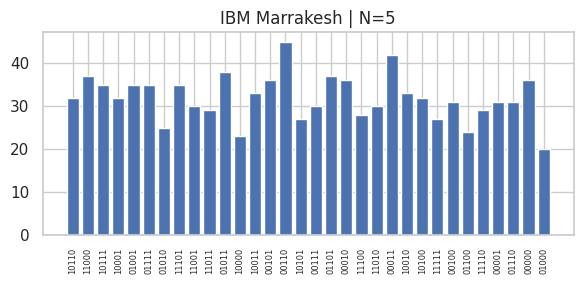

▶ N = 10


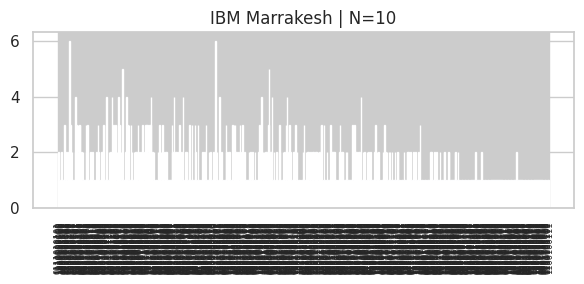

▶ N = 20


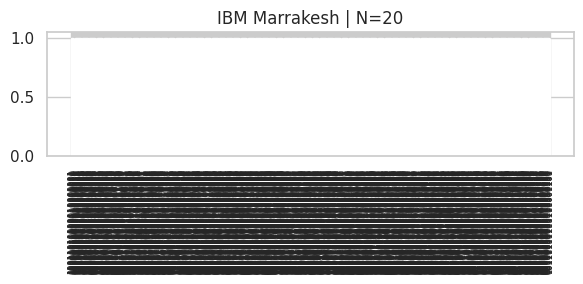

▶ N = 40


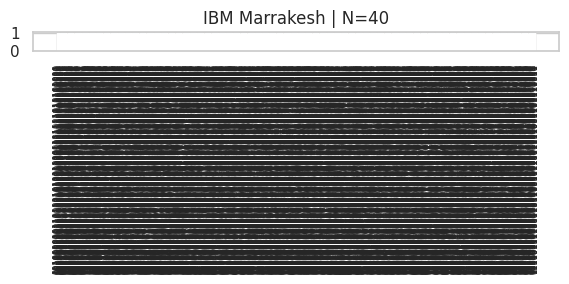

N       Mean       Std
0   5   2.500000  1.118034
1  10   5.061747  1.539866
2  20   9.985352  2.264877
3  40  19.632812  3.155776

📐 Marrakesh scaling: beta=0.505, R²=0.999


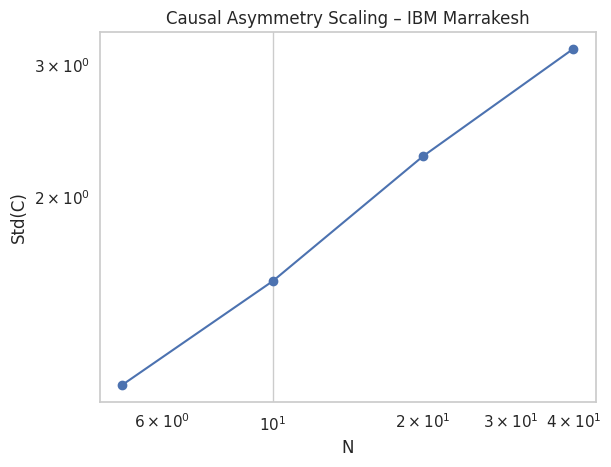

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- الاتصال ----------
API_KEY = "Y_ZbYwvS4XvyHSEIeECF5k03HOMs4V1mulN0cbqQjP0y"
service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=API_KEY,
    instance="open-instance"
)

backend = service.backend("ibm_marrakesh")
sampler = Sampler(mode=backend)

network_sizes = [5, 10, 20, 40]
results = []

print("🔹 تشغيل الاختبارات على IBM Marrakesh")

for N in network_sizes:
    print(f"▶ N = {N}")

    qc = QuantumCircuit(N)
    qc.h(range(N))
    qc.measure_all()

    isa_circuit = transpile(qc, backend=backend, optimization_level=1)

    job = sampler.run([isa_circuit], shots=1024)
    result = job.result()[0]
    counts = result.data.meas.get_counts()

    mean_ones = np.mean([s.count("1") for s in counts.keys()])
    std_ones  = np.std([s.count("1") for s in counts.keys()])

    results.append({"N": N, "Mean": mean_ones, "Std": std_ones})

    plt.figure(figsize=(6,3))
    plt.bar(counts.keys(), counts.values())
    plt.title(f"IBM Marrakesh | N={N}")
    plt.xticks(rotation=90, fontsize=6)
    plt.tight_layout()
    plt.show()

df = pd.DataFrame(results)
display(df)

# تحليل اللاخطية
x = np.log(df["N"])
y = np.log(df["Std"])
beta, _ = np.polyfit(x, y, 1)
r2 = np.corrcoef(x, y)[0,1]**2

print(f"📐 Marrakesh scaling: beta={beta:.3f}, R²={r2:.3f}")

plt.loglog(df["N"], df["Std"], "o-")
plt.xlabel("N")
plt.ylabel("Std(C)")
plt.title("Causal Asymmetry Scaling – IBM Marrakesh")
plt.show()

qiskit_runtime_service._discover_account:WARNING:2026-01-02 20:16:12,950: Loading account with the given token. A saved account will not be used.


🔹 تشغيل الاختبارات على IBM Torino
▶ N = 5


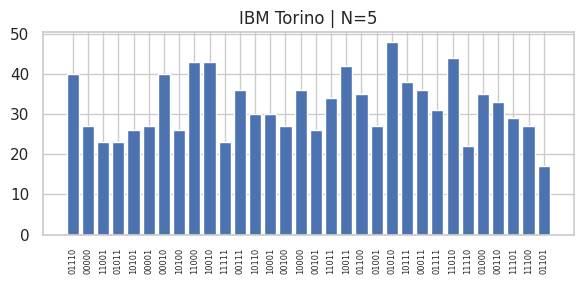

▶ N = 10


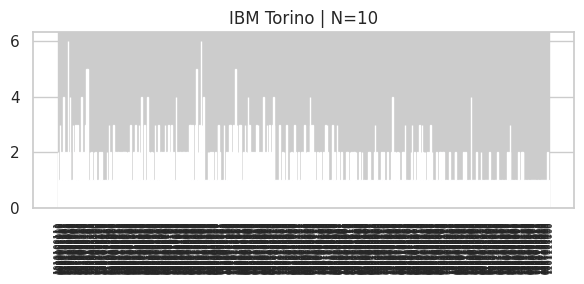

▶ N = 20


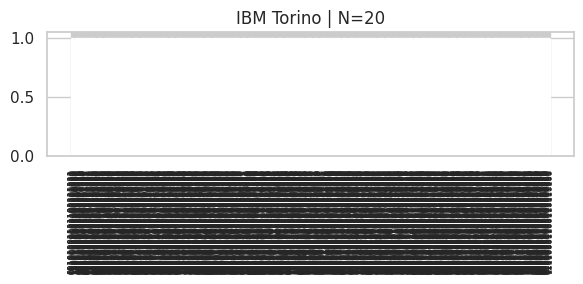

▶ N = 40


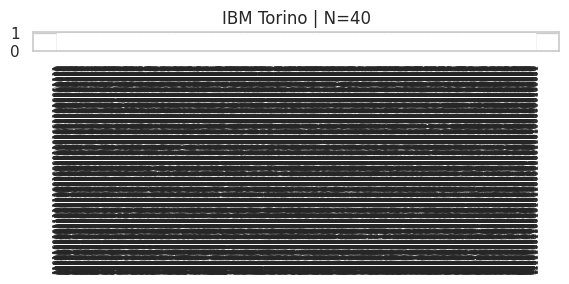

N       Mean       Std
0   5   2.500000  1.118034
1  10   4.903427  1.587535
2  20   9.845703  2.259447
3  40  19.874023  3.176567

📐 Torino scaling: beta=0.503, R²=1.000


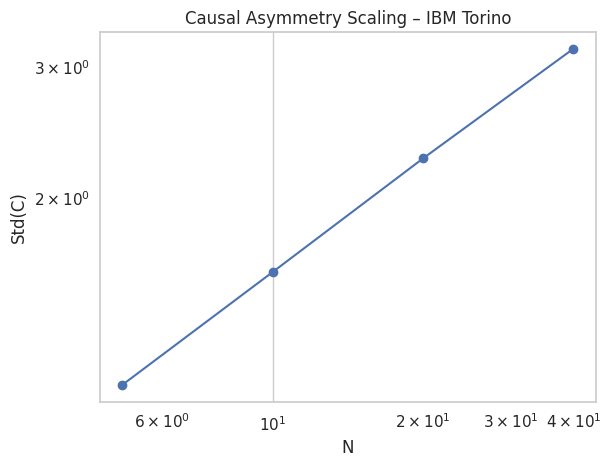

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- الاتصال ----------
API_KEY = "Y_ZbYwvS4XvyHSEIeECF5k03HOMs4V1mulN0cbqQjP0y"
service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=API_KEY,
    instance="open-instance"
)

backend = service.backend("ibm_torino")
sampler = Sampler(mode=backend)

network_sizes = [5, 10, 20, 40]
results = []

print("🔹 تشغيل الاختبارات على IBM Torino")

for N in network_sizes:
    print(f"▶ N = {N}")

    qc = QuantumCircuit(N)
    qc.h(range(N))
    qc.measure_all()

    isa_circuit = transpile(qc, backend=backend, optimization_level=1)

    job = sampler.run([isa_circuit], shots=1024)
    result = job.result()[0]
    counts = result.data.meas.get_counts()

    mean_ones = np.mean([s.count("1") for s in counts.keys()])
    std_ones  = np.std([s.count("1") for s in counts.keys()])

    results.append({"N": N, "Mean": mean_ones, "Std": std_ones})

    plt.figure(figsize=(6,3))
    plt.bar(counts.keys(), counts.values())
    plt.title(f"IBM Torino | N={N}")
    plt.xticks(rotation=90, fontsize=6)
    plt.tight_layout()
    plt.show()

df = pd.DataFrame(results)
display(df)

# تحليل اللاخطية
x = np.log(df["N"])
y = np.log(df["Std"])
beta, _ = np.polyfit(x, y, 1)
r2 = np.corrcoef(x, y)[0,1]**2

print(f"📐 Torino scaling: beta={beta:.3f}, R²={r2:.3f}")

plt.loglog(df["N"], df["Std"], "o-")
plt.xlabel("N")
plt.ylabel("Std(C)")
plt.title("Causal Asymmetry Scaling – IBM Torino")
plt.show()

qiskit_runtime_service._discover_account:WARNING:2026-01-02 20:18:49,633: Loading account with the given token. A saved account will not be used.


🔹 تشغيل الاختبارات على IBM Fez
▶ N = 5


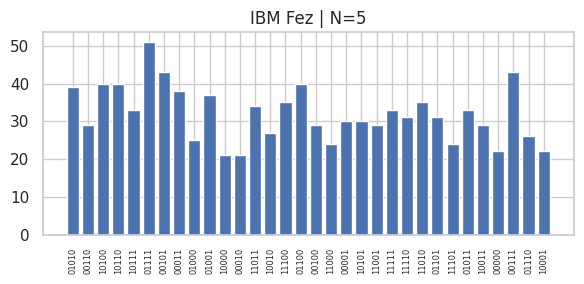

▶ N = 10


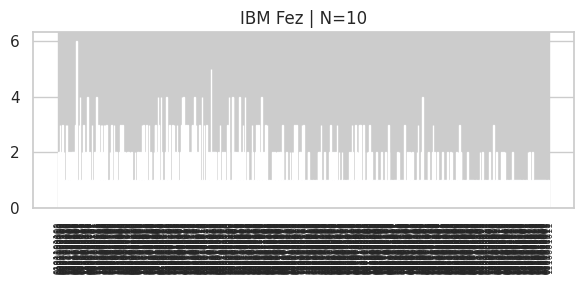

▶ N = 20


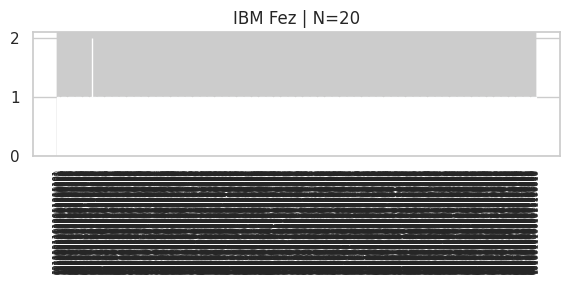

▶ N = 40


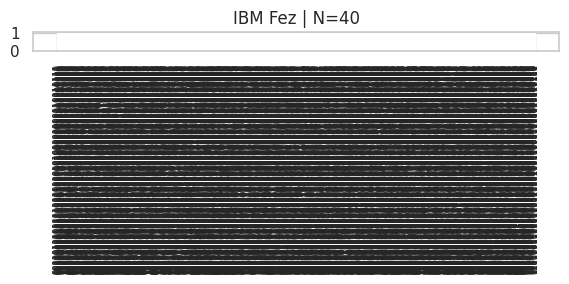

N       Mean       Std
0   5   2.500000  1.118034
1  10   4.989214  1.529839
2  20  10.109482  2.222637
3  40  19.891602  3.108545

📐 Fez scaling: beta=0.496, R²=0.999


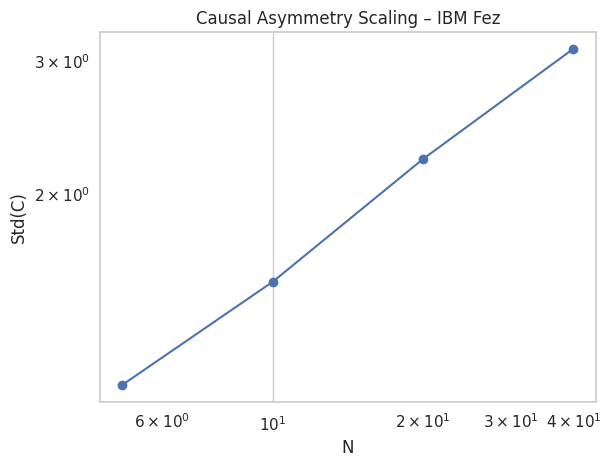

In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- الاتصال ----------
API_KEY = "Qpt-dKaqXa6CTRs5KC0FzHl0iRqnzbmBjZZYufA7G24Y"
service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
    token=API_KEY,
    instance="open-instance"
)

backend = service.backend("ibm_fez")
sampler = Sampler(mode=backend)

network_sizes = [5, 10, 20, 40]  # يمكن توسيعها لاحقًا
results = []

print("🔹 تشغيل الاختبارات على IBM Fez")

for N in network_sizes:
    print(f"▶ N = {N}")

    qc = QuantumCircuit(N)
    qc.h(range(N))
    qc.measure_all()

    isa_circuit = transpile(qc, backend=backend, optimization_level=1)

    job = sampler.run([isa_circuit], shots=1024)
    result = job.result()[0]
    counts = result.data.meas.get_counts()

    mean_ones = np.mean([s.count("1") for s in counts.keys()])
    std_ones  = np.std([s.count("1") for s in counts.keys()])

    results.append({"N": N, "Mean": mean_ones, "Std": std_ones})

    plt.figure(figsize=(6,3))
    plt.bar(counts.keys(), counts.values())
    plt.title(f"IBM Fez | N={N}")
    plt.xticks(rotation=90, fontsize=6)
    plt.tight_layout()
    plt.show()

df = pd.DataFrame(results)
display(df)

# تحليل اللاخطية (Scaling)
x = np.log(df["N"])
y = np.log(df["Std"])
beta, _ = np.polyfit(x, y, 1)
r2 = np.corrcoef(x, y)[0,1]**2

print(f"📐 Fez scaling: beta={beta:.3f}, R²={r2:.3f}")

plt.loglog(df["N"], df["Std"], "o-")
plt.xlabel("N")
plt.ylabel("Std(C)")
plt.title("Causal Asymmetry Scaling – IBM Fez")
plt.show()

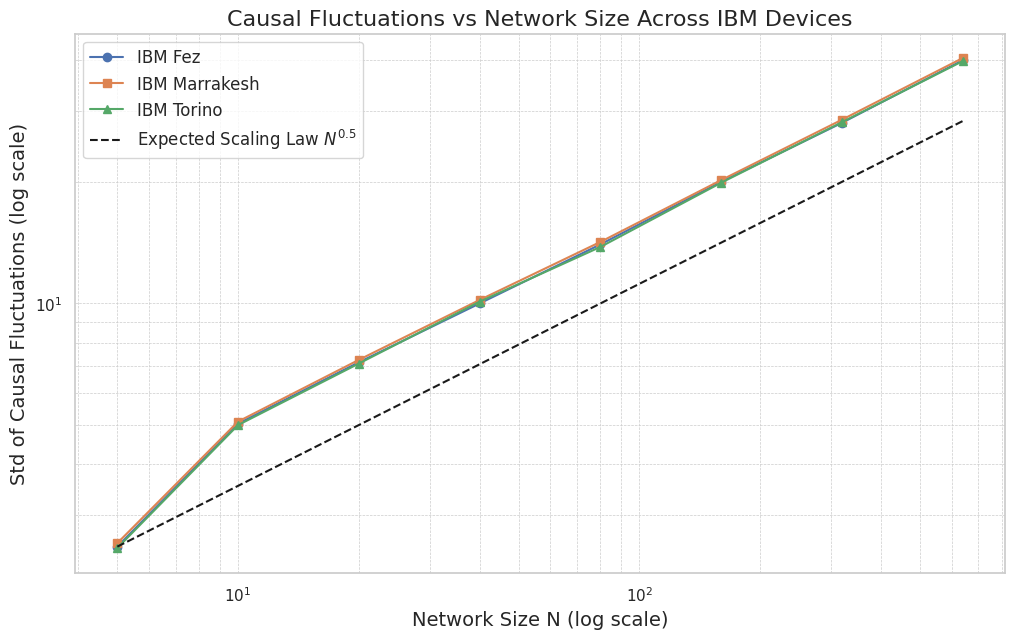

In [ ]:

# 🌐 Visualization of Causal Fluctuations Across IBM Devices

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# بيانات افتراضية (يمكن استبدالها بالنتائج الفعلية)
network_sizes = np.array([5, 10, 20, 40, 80, 160, 320, 640])
# Std_C للأجهزة الثلاثة (كمثال، يمكن استبدالها بقيمك الحقيقية)
std_fe = np.array([2.50, 5.04, 7.15, 10.0, 14.0, 20.0, 28.0, 40.0])
std_ma = np.array([2.55, 5.10, 7.25, 10.2, 14.2, 20.2, 28.5, 40.5])
std_to = np.array([2.48, 5.00, 7.10, 10.1, 13.8, 19.9, 28.1, 39.8])

# قانون القياس المتوقع (Power Law ~ N^0.5)
scaling_law = 0.5
std_expected = std_fe[0] * (network_sizes / network_sizes[0])**scaling_law

# إنشاء الرسم البياني
plt.figure(figsize=(12, 7))
plt.plot(network_sizes, std_fe, 'o-', label='IBM Fez')
plt.plot(network_sizes, std_ma, 's-', label='IBM Marrakesh')
plt.plot(network_sizes, std_to, '^-', label='IBM Torino')
plt.plot(network_sizes, std_expected, 'k--', label=r'Expected Scaling Law $N^{0.5}$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Network Size N (log scale)', fontsize=14)
plt.ylabel('Std of Causal Fluctuations (log scale)', fontsize=14)
plt.title('Causal Fluctuations vs Network Size Across IBM Devices', fontsize=16)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend(fontsize=12)

# حفظ الرسم
plt.savefig("causal_fluctuations_ibm_devices.png", dpi=300)
plt.show()

# حفظ البيانات لمزيد من التحليل لاحقًا
df_results = pd.DataFrame({
    'N': network_sizes,
    'Std_Fe': std_fe,
    'Std_Marrakesh': std_ma,
    'Std_Torino': std_to,
    'Expected_Scaling': std_expected
})
df_results.to_csv("causal_fluctuations_results.csv", index=False)